In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
info_df = pd.read_csv("lending_club_info.csv")

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
info_df

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [5]:
df = pd.read_csv("lending_club_loan_two.csv")

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<AxesSubplot:xlabel='loan_status', ylabel='count'>

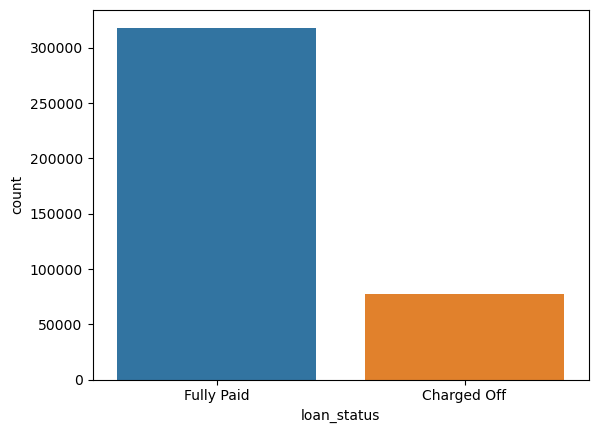

In [7]:
sns.countplot(data=df, x="loan_status")

## მონაცემების 80.3% არის Fully Paid, ჩვენმა მოდელმა ამაზე სიზუსტე უნდა აჩვენოს.

In [8]:
df['loan_status'].value_counts(normalize=True) * 100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

# Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## დავთვალოთ გამოტოვებული მნიშვნელობების პროცენტულობა სვეტების მიხედვით. Mort_acc ს აქვს ყველაზე ბევრი - 9.5 პროცენტი.

In [10]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [11]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_amnt               0.000000
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
address                 0.000000
dtype: float64

## სტრიქონების 15% ს აქვს ერთი მაინც ცარიელი მნიშვნელობა

In [12]:
(df.isna().sum(axis=1) > 0).sum()

60162

In [13]:
60162 / len(df) * 100

15.191273388379667

In [14]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [15]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [16]:
df['mort_acc'].value_counts()[0:10]

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
Name: mort_acc, dtype: int64

* ### emp_title შეიცავს ძალიან ბევრ განსხვავებულ კატეგორიულ ცვლადს, მისი გამოყენება მოდელის ასაგებად არ ჩანს პრაქტიკული, შეგვიძლია დავდროპოთ.
* ### emp_length ერთი შეხედვით მნიშვნელოვანი ცვლადი ჩანს. გადავამოწმებ რამდენად შეესაბამება ჩემი ინტუიცია რეალურ მონაცემებს და იმის მიხედვით მივიღებ გადაწყვეტილებას: თუ მართლაც მნიშვნელოვანია, მაშინ დავდროპავ ისეთ სტრიქონებს, სადაც emp_length არ გვაქვს, თუ არ არის მნიშვნელოვანი, შესაძლოა თვითონ სვეტი დავდროპო.
* ### mort_acc-ც ისეთი რამაა, რასაც დამატებითი შესაწვლა სჭირდება. თუ mort_acc ს მნიშვნელობა დიდ გავლენას არ ახდენს, შესაძლებელია უბრალოდ 0 ებით ამოვსება ცარიელი მნიშვნელობების.
* ### დანარჩენი ცარიელი მნიშვნელობები საკმაოდ ცოტაა და შეგვიძლია უბრალოდ დავდროპოთ შესაბამისი სტრიქონები.

<AxesSubplot:>

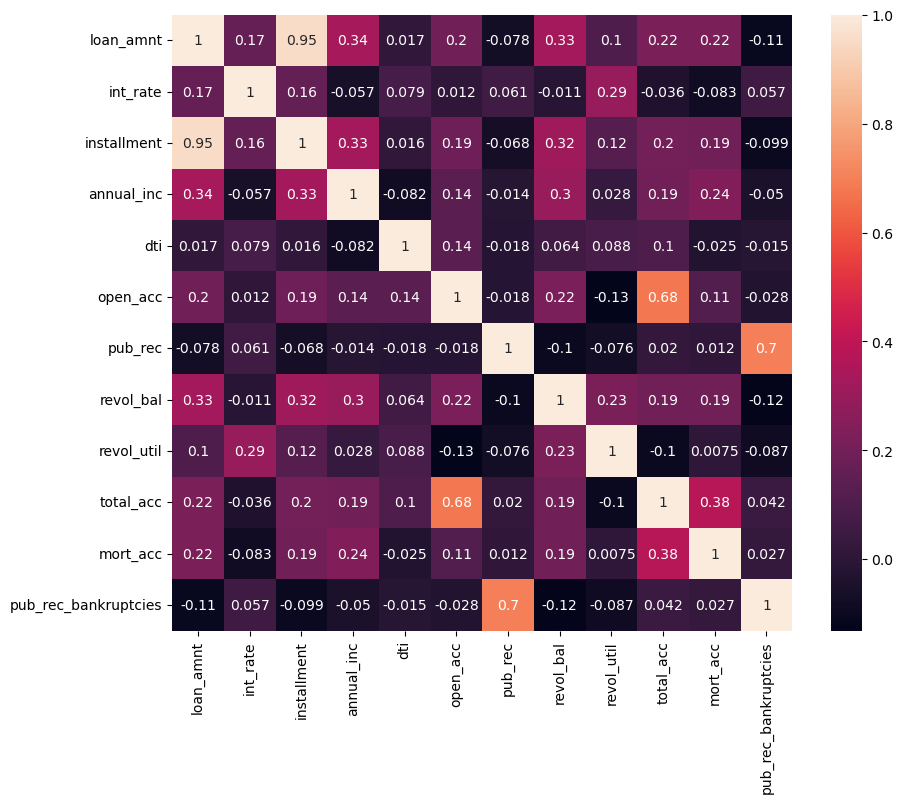

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True)

###  კორელაციის მატრიცი რაიმე განსაკუთრებულ ინფორმაციას არ მაძლევს. ის მონაცემები, რომლებიც მეტად კორელირებულია, მათივე განმარტებებიდან ჩანს. მაგალითად, installment არის სესხის თვიურად დასაფარი ღირებულება, რაც ბუნებრივია, რომ კორელირებული იქნება სესხის ოდენობასთან.

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

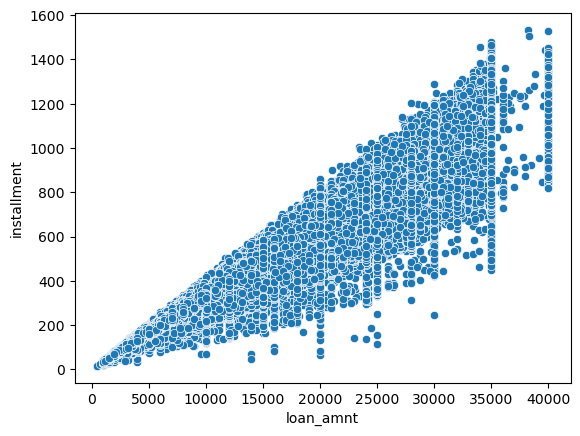

In [18]:
sns.scatterplot(data=df, x='loan_amnt', y='installment')

## Let's explore how loan status depends on some of the features.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### ეს ფუნქცია აგებს catplot ს გადაცემული სვეტებისთვის და გრაფს თავზე აწერს პროცენტებს.

In [20]:
def feature_countplot(df, x, hue, hue_order, class_order, rotate=False, display_odds=False):
    
    g = sns.catplot(data=df, kind='count', x=x, hue=hue, order=class_order, hue_order=hue_order)
    
    if rotate:
        for axes in g.axes.flat:
            _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
    percents = []

    for c_o in class_order:
        c_o_percents = df[df[x] == c_o][hue].value_counts(normalize=True)
        percents.append(c_o_percents[0])
        percents.append(c_o_percents[1])
        
    sorted_patches = sorted(g.ax.patches, key=lambda rect : rect.xy[0])

    for i, p in enumerate(sorted_patches):
        if display_odds:
            if i % 2 != 0:
                continue
                
        percent = percents[i]
        txt = str((percent * 100).round(2) ) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    return g

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Loan_amnt ს აქვს გარკვეული გავლენა loan_status ზე, პატარა რაოდენობის სესხებს უფრო  უფრო დიდი ალბათობით აბრუნებენ, ვიდრე დიდი რაოდენობის სესხებს. ამ მონაცემებს ბევრი აუთლაიერი არ აქვს, ამიტომ დავტოვებ უცვლელს.

In [22]:
df['loan_amnt'].value_counts()

10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: loan_amnt, Length: 1397, dtype: int64

In [23]:
df['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

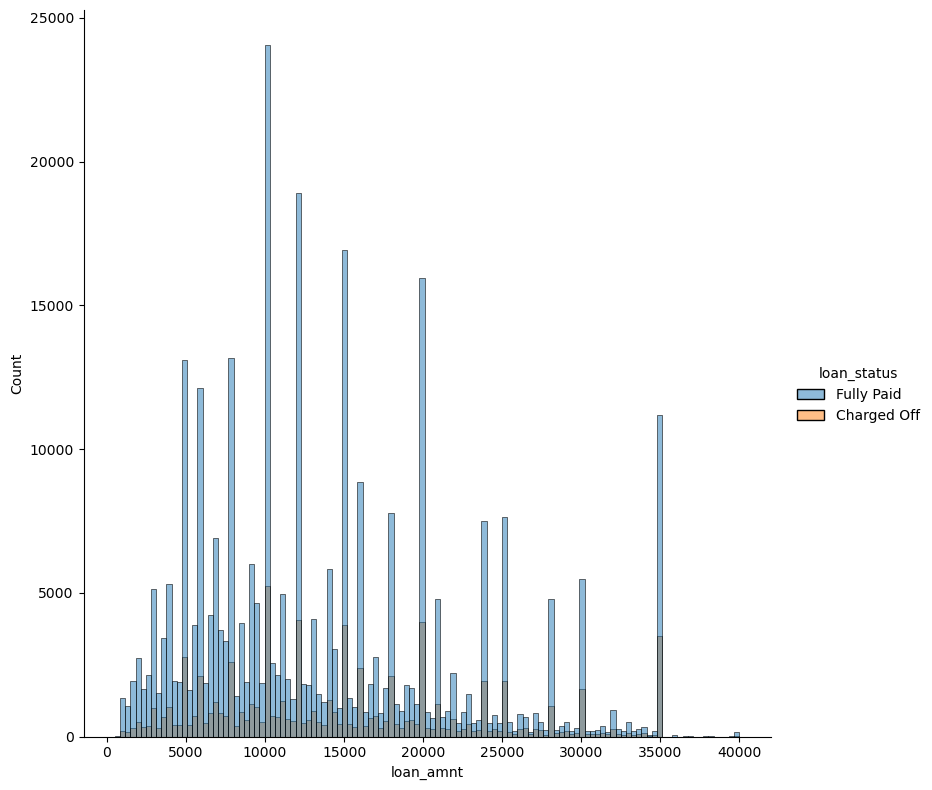

In [24]:
sns.displot(df, x='loan_amnt', hue='loan_status', height=8)

In [25]:
df[df['loan_amnt'] <= 5000]['loan_status'].value_counts(normalize=True) * 100

Fully Paid     83.625936
Charged Off    16.374064
Name: loan_status, dtype: float64

In [26]:
df[(df['loan_amnt'] >= 20000) & (df['loan_amnt'] <= 30000)]['loan_status'].value_counts(normalize=True) * 100

Fully Paid     78.147325
Charged Off    21.852675
Name: loan_status, dtype: float64

In [27]:
df[df['loan_amnt'] >= 35000]['loan_status'].value_counts(normalize=True) * 100

Fully Paid     76.538384
Charged Off    23.461616
Name: loan_status, dtype: float64

In [28]:
(df['loan_amnt'] >= 35000).sum()

14837

## int_rate ს ძალიან დიდი გავლენა აქვს loan_status ზე, რაც გრაფიკიდანაც ჩანს და value_count ებიდანაც. int_rate >= 20 ებს (31000 მონაცემიდან) დაახლოებით 40% Charged Off აქვს, რაც ძალიან მაღალია. ამ მონაცემებშიც აუთლაიერები დიდად არ გვაქვს, ამიტომ დავტოვებ როგორც არის.

In [29]:
df['int_rate'].value_counts()

10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: int_rate, Length: 566, dtype: int64

In [30]:
df['int_rate'].describe()

count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64

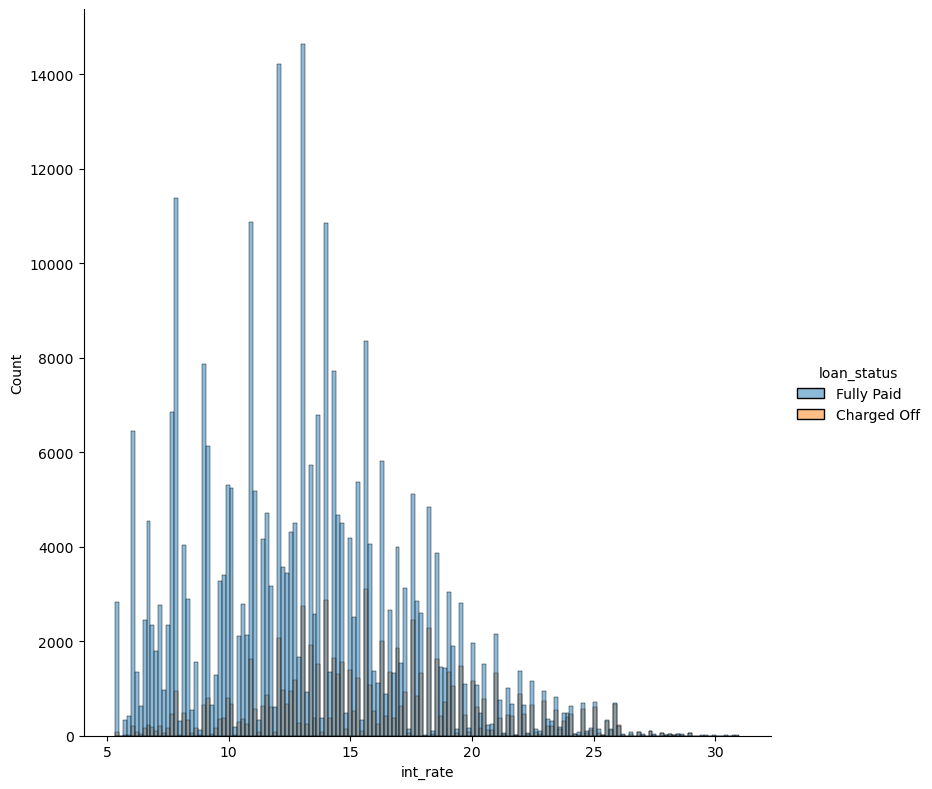

In [31]:
sns.displot(df, x='int_rate', hue='loan_status', height=8)

In [32]:
df[df['int_rate'] <= 10]['loan_status'].value_counts(normalize=True) * 100

Fully Paid     92.276277
Charged Off     7.723723
Name: loan_status, dtype: float64

In [33]:
df[df['int_rate'] <= 20]['loan_status'].value_counts(normalize=True) * 100

Fully Paid     82.126786
Charged Off    17.873214
Name: loan_status, dtype: float64

In [34]:
df[df['int_rate'] >= 20]['loan_status'].value_counts(normalize=True) * 100

Fully Paid     60.90024
Charged Off    39.09976
Name: loan_status, dtype: float64

In [35]:
(df['int_rate'] >= 20).sum()

32458

### home_ownership ს მოვაშოროთ OTHER, NONE და ANY ცვლადები.

In [36]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [37]:
df = df[(df['home_ownership'] != 'OTHER') & (df['home_ownership'] != 'NONE') & (df['home_ownership'] != 'ANY')]

### home_ownership ს შესამჩნევი გავლენა აქვს loan_status ზე, შეგვიძლია ეს მნიშვნელობები დავა one-hot encode ოთ.

In [38]:
class_order = list(df['home_ownership'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

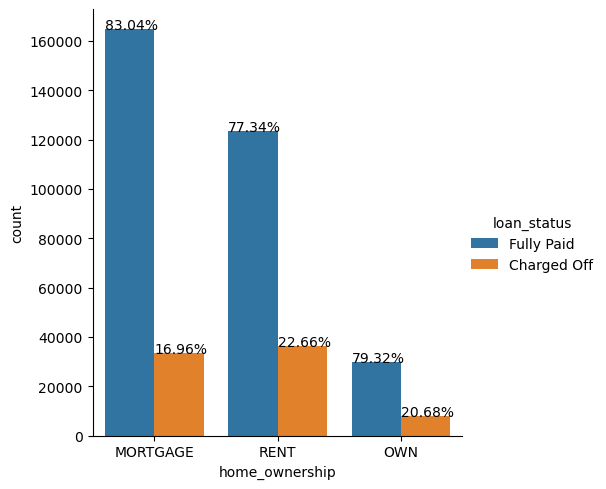

In [39]:
feature_countplot(df, x='home_ownership', hue='loan_status', class_order=class_order, hue_order = hue_order)

In [40]:
df['grade'].value_counts()

B    115969
C    105950
A     64161
D     63502
E     31483
F     11767
G      3052
Name: grade, dtype: int64

In [41]:
class_order = sorted(list(df['grade'].value_counts().index))
hue_order = ['Fully Paid', 'Charged Off']

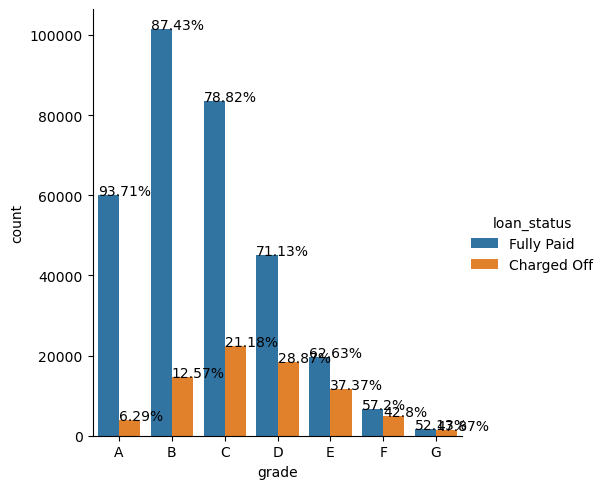

In [42]:
feature_countplot(df, x='grade', hue='loan_status', hue_order=hue_order, class_order=class_order)

In [43]:
# class_order = sorted(list(df['sub_grade'].value_counts().index))
# hue_order = ['Fully Paid', 'Charged Off']

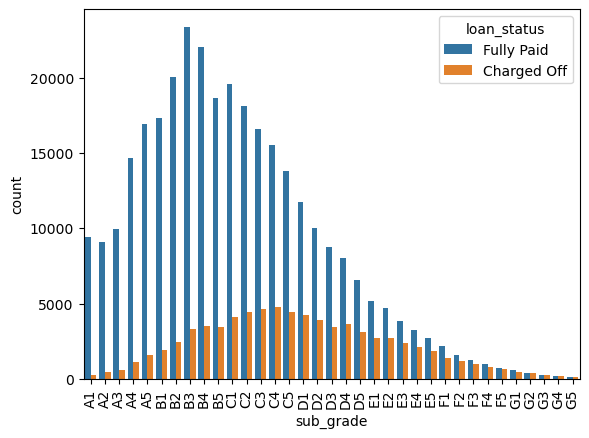

In [44]:
sub_grade_order = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(data=df, x='sub_grade', hue='loan_status', order=sub_grade_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## ამ გრაფებიდან ჩანს, რომ grade ბი საკმაოდ დიდ გავლენას სესხის გადახდა / არ გადახდაზე. A გადახდის რეიტი 93.7% ია, ხოლო F  და G სთვის დაახლოებით 50%.

In [45]:
df['emp_length'].value_counts()

10+ years    126003
2 years       35814
< 1 year      31704
3 years       31652
5 years       26486
1 year        25867
4 years       23943
6 years       20831
7 years       20814
8 years       19163
9 years       15310
Name: emp_length, dtype: int64

In [46]:
class_order = ['< 1 year',
               '1 year',
               '2 years',
               '3 years',
               '4 years',
               '5 years',
               '6 years',
               '7 years',
               '8 years',
               '9 years',
               '10+ years'
              ]
hue_order = ['Fully Paid', 'Charged Off']

## როგორც ჩანს emp_length ის ცვლილება დიდ გავლენას არ ახდენს loan_status ზე, ერთადერთი შედარებით საგრძნობი ცვლილება შეინიშნება 10+ years ზე.

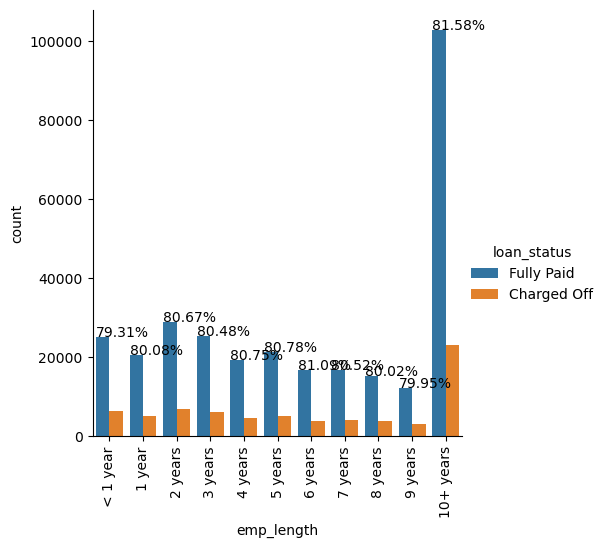

In [47]:
feature_countplot(df, x='emp_length', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)

In [48]:
counts = df['mort_acc'].value_counts()
counts

0.0     139753
1.0      60404
2.0      49936
3.0      38043
4.0      27885
5.0      18191
6.0      11065
7.0       6050
8.0       3120
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

## გავფილტროთ მონაცემები, რომლებიც 10-ზე ნაკლებჯერ გვხვდება.

In [49]:
df = df[df['mort_acc'].isin(counts[counts > 10].index)]

In [50]:
df['mort_acc'].value_counts()

0.0     139753
1.0      60404
2.0      49936
3.0      38043
4.0      27885
5.0      18191
6.0      11065
7.0       6050
8.0       3120
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
Name: mort_acc, dtype: int64

In [51]:
class_order = sorted(list(df['mort_acc'].value_counts().index))
hue_order = ['Fully Paid', 'Charged Off']

## როგორც ჩანს, Fully Paid ის პროცენტული რაოდენობა იზრდება mort_acc ს ზრდასთან ერთად. გამონაკლისია 16.0, თუმცა 14 - ზე მეტი ძალიან ცოტაა და ეგ მნიშვნელობები უბრალოდ გადავაგდოთ.

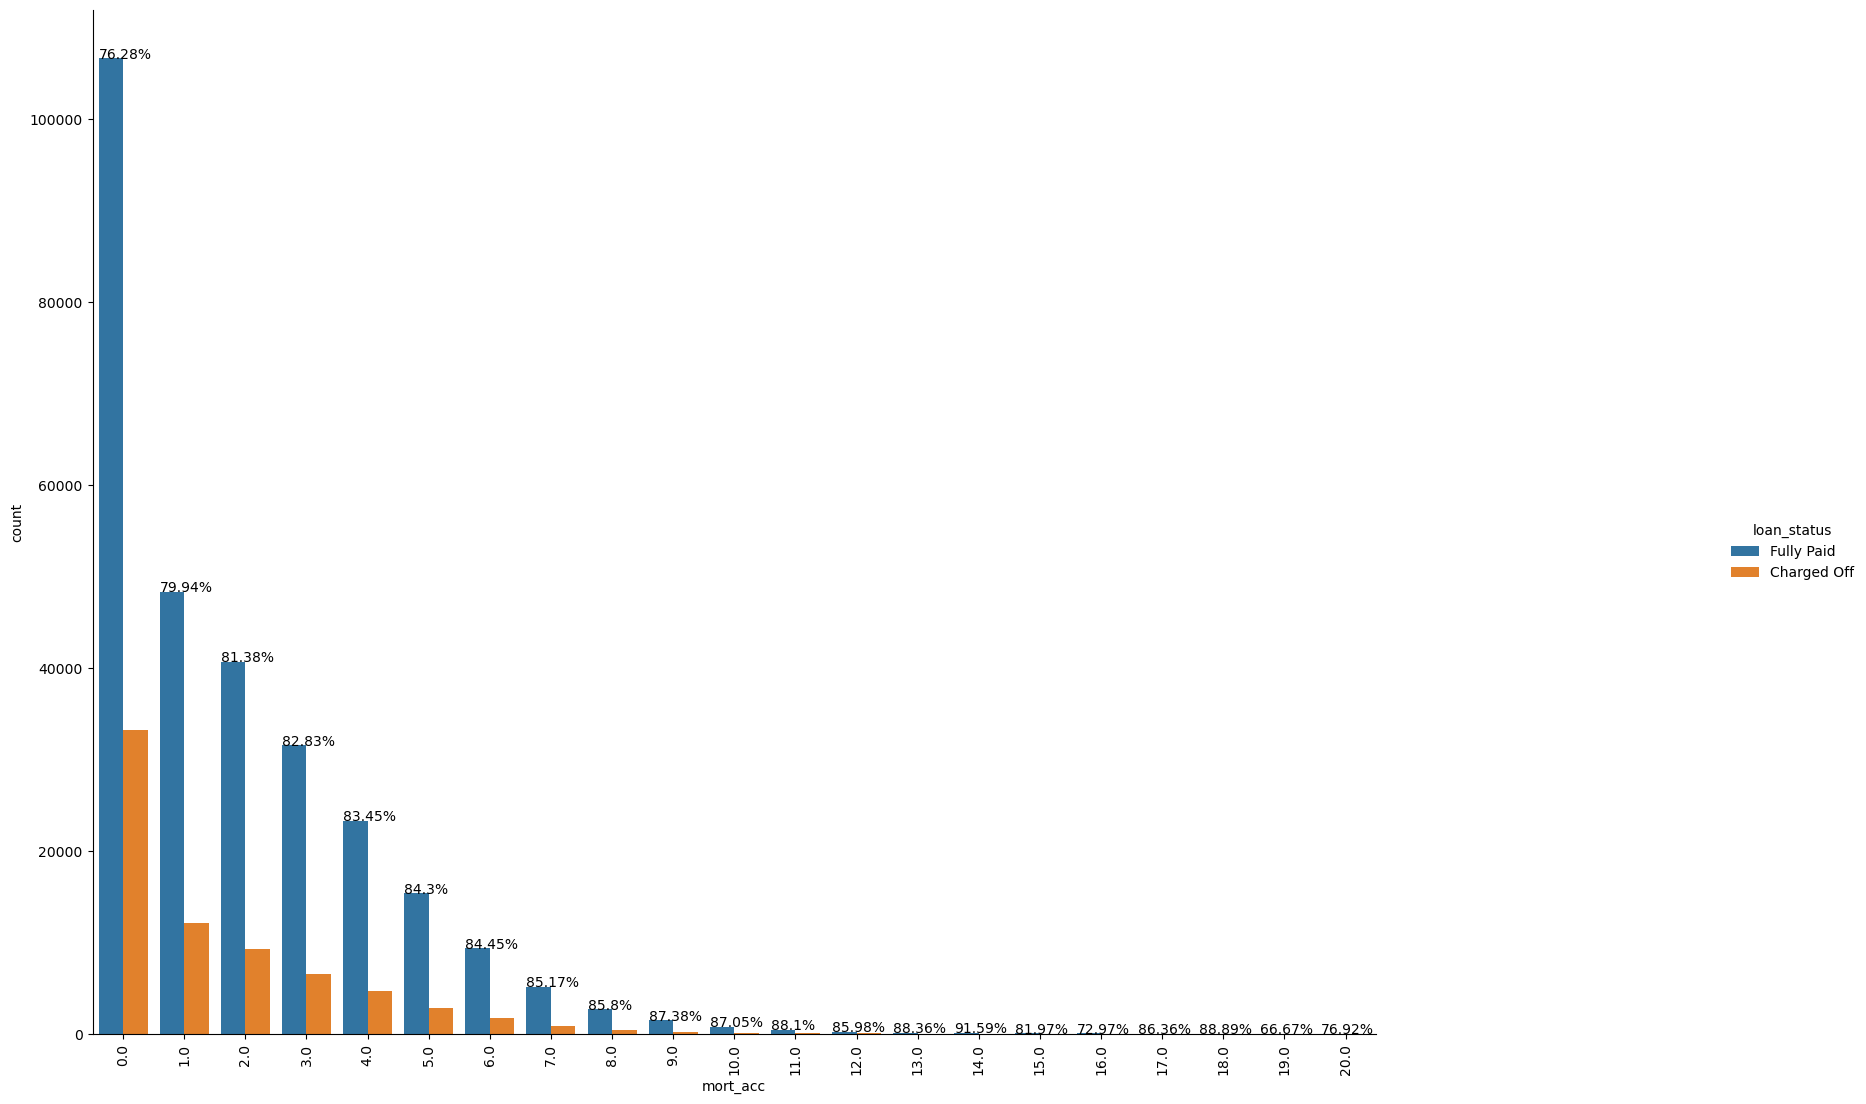

In [52]:
g = feature_countplot(df, x='mort_acc', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)
g.fig.set_size_inches(22, 12)

## როგორც ჩანს, term ძალიან მნიშვნელოვანი ინფორმაციაა, რადგან 36 თვიან სესხებზე გადახდის პროცენტულობა ბევრად მაღალია.

In [53]:
class_order = list(df['term'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

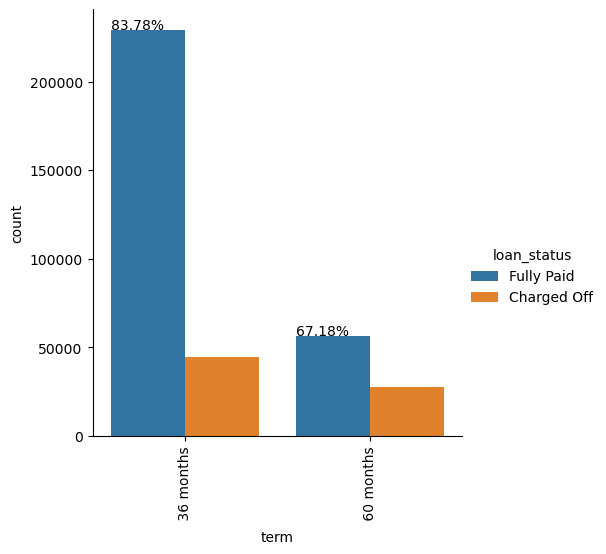

In [54]:
g = feature_countplot(df, x='term', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)

## ცოტა უცნაურია, მაგრამ როგორც ჩანს, Not Verified - სტატუსის მქონე ხალხი უფრო მეტად იხდის სესხს.

In [55]:
class_order = list(df['verification_status'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

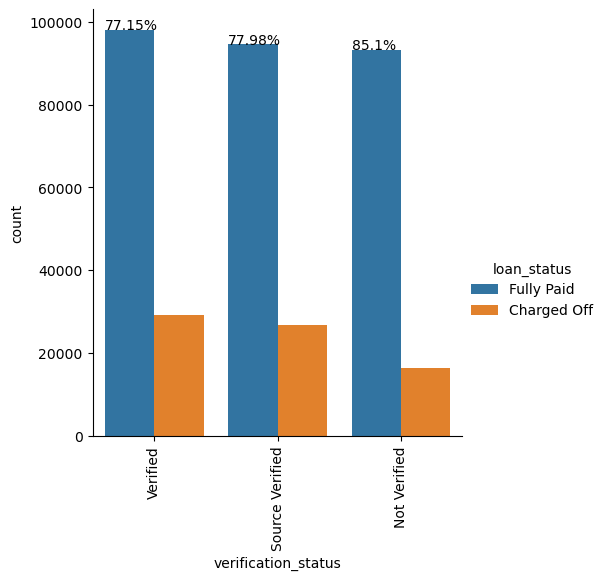

In [56]:
g = feature_countplot(df, x='verification_status', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)

In [57]:
df['purpose'].value_counts()

debt_consolidation    216441
credit_card            77648
home_improvement       21340
other                  17567
major_purchase          6851
small_business          3941
medical                 3570
car                     3288
moving                  2344
vacation                2123
house                   1818
wedding                  957
renewable_energy         241
educational                1
Name: purpose, dtype: int64

### დავდროპოთ educational მნიშვნელობა, რადგან მხოლოდ 1 ხელ გვხვდება.

In [58]:
df = df[df['purpose'] != 'educational']

In [59]:
class_order = list(df['purpose'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

## როგორც ჩანს purpose ს აქვს გარკვეული გავლენა loan_status ზე, ამიტომ შეგვიძლია მონაცემები დავა one-hot-encode და გამოვიყენოთ.

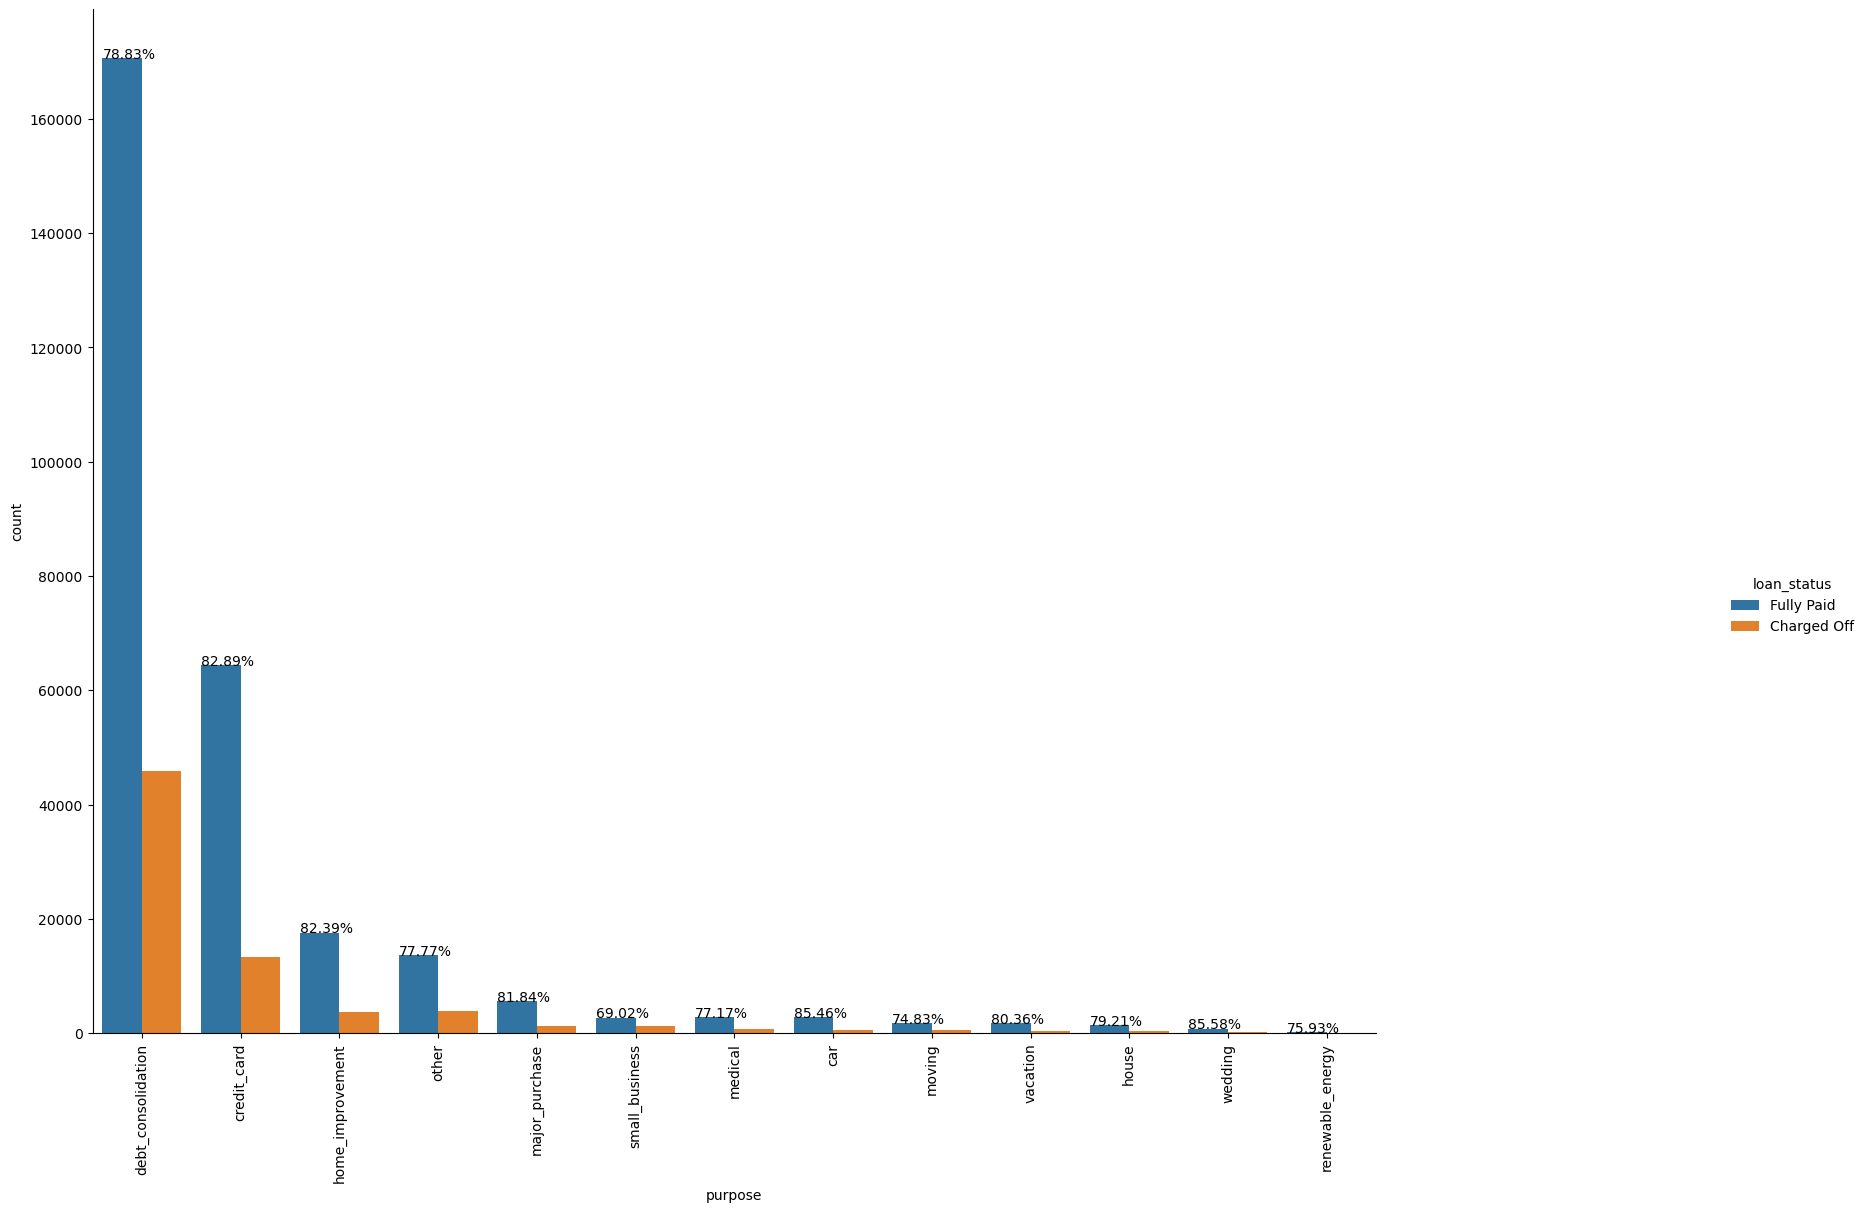

In [60]:
g = feature_countplot(df, x='purpose', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)
g.fig.set_size_inches(22, 12)

In [61]:
df['dti'].value_counts()

14.40    279
16.80    271
20.40    266
19.20    265
18.00    259
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [62]:
df['dti'].describe()

count    358129.000000
mean         17.787272
std          18.778115
min           0.000000
25%          11.630000
50%          17.290000
75%          23.490000
max        9999.000000
Name: dti, dtype: float64

In [63]:
(df['dti'] > 40).sum()

296

## dti ს დიდი აუთლაიერები აქვს, 40 ზე მეტი მხოლოდ 296 რეზულტატია, ამიტომ შეგვიძლია გავფილტროთ 40 მდე.

In [64]:
df = df[df['dti'] <= 40]

<AxesSubplot:xlabel='dti', ylabel='Count'>

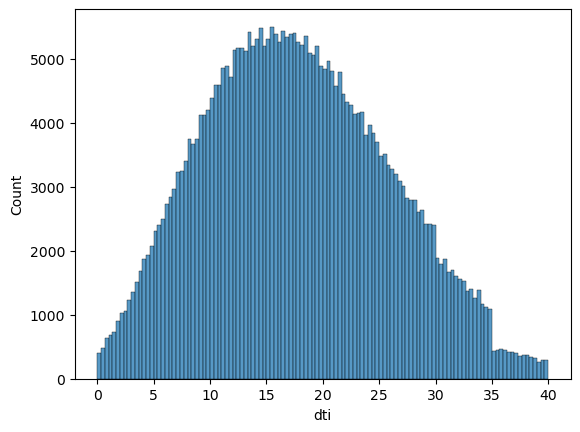

In [65]:
sns.histplot(data=df, x='dti')

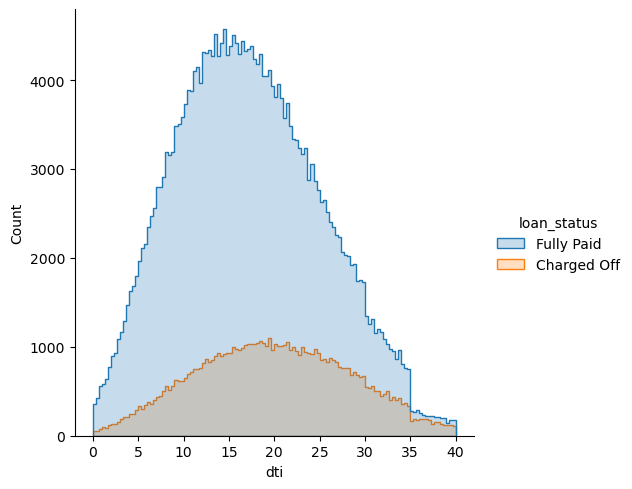

In [66]:
sns.displot(df, x="dti", hue="loan_status", element="step")

In [67]:
df['earliest_cr_line'].value_counts()

Oct-2000    2679
Aug-2001    2676
Aug-2000    2663
Oct-2001    2629
Aug-2002    2434
            ... 
Jul-1958       1
Nov-1954       1
Nov-1957       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 680, dtype: int64

In [68]:
counts = df['open_acc'].value_counts()
counts

9.0     33111
10.0    32278
8.0     31353
11.0    29973
7.0     27476
        ...  
55.0        2
76.0        2
57.0        1
58.0        1
90.0        1
Name: open_acc, Length: 61, dtype: int64

In [69]:
df = df[df['open_acc'].isin(counts[counts >= 40].index)]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357703 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             357703 non-null  float64
 1   term                  357703 non-null  object 
 2   int_rate              357703 non-null  float64
 3   installment           357703 non-null  float64
 4   grade                 357703 non-null  object 
 5   sub_grade             357703 non-null  object 
 6   emp_title             337259 non-null  object 
 7   emp_length            340504 non-null  object 
 8   home_ownership        357703 non-null  object 
 9   annual_inc            357703 non-null  float64
 10  verification_status   357703 non-null  object 
 11  issue_d               357703 non-null  object 
 12  loan_status           357703 non-null  object 
 13  purpose               357703 non-null  object 
 14  title                 355983 non-null  object 
 15  

In [71]:
counts = df['pub_rec'].value_counts()
counts

0.0     301896
1.0      47856
2.0       5420
3.0       1511
4.0        526
5.0        237
6.0        121
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [72]:
df = df[df['pub_rec'].isin(counts[counts >= 10].index)]

In [73]:
list(df['pub_rec'].value_counts().index)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [74]:
class_order = sorted(list(df['pub_rec'].value_counts().index))
hue_order = ['Fully Paid', 'Charged Off']

## pub_rec ის ზრდასთან ერთად, Fully Paid ის პროცენტულობა მცირდება, თუმცა 5 ზე ზემოთ ისევ იწევს. რადგან 5 დან ზემოთ მონაცემები ძალიან ცოტაა, შეგვიძლია აუთლაიერებად მივიჩნიოთ და გადავაგდოთ.

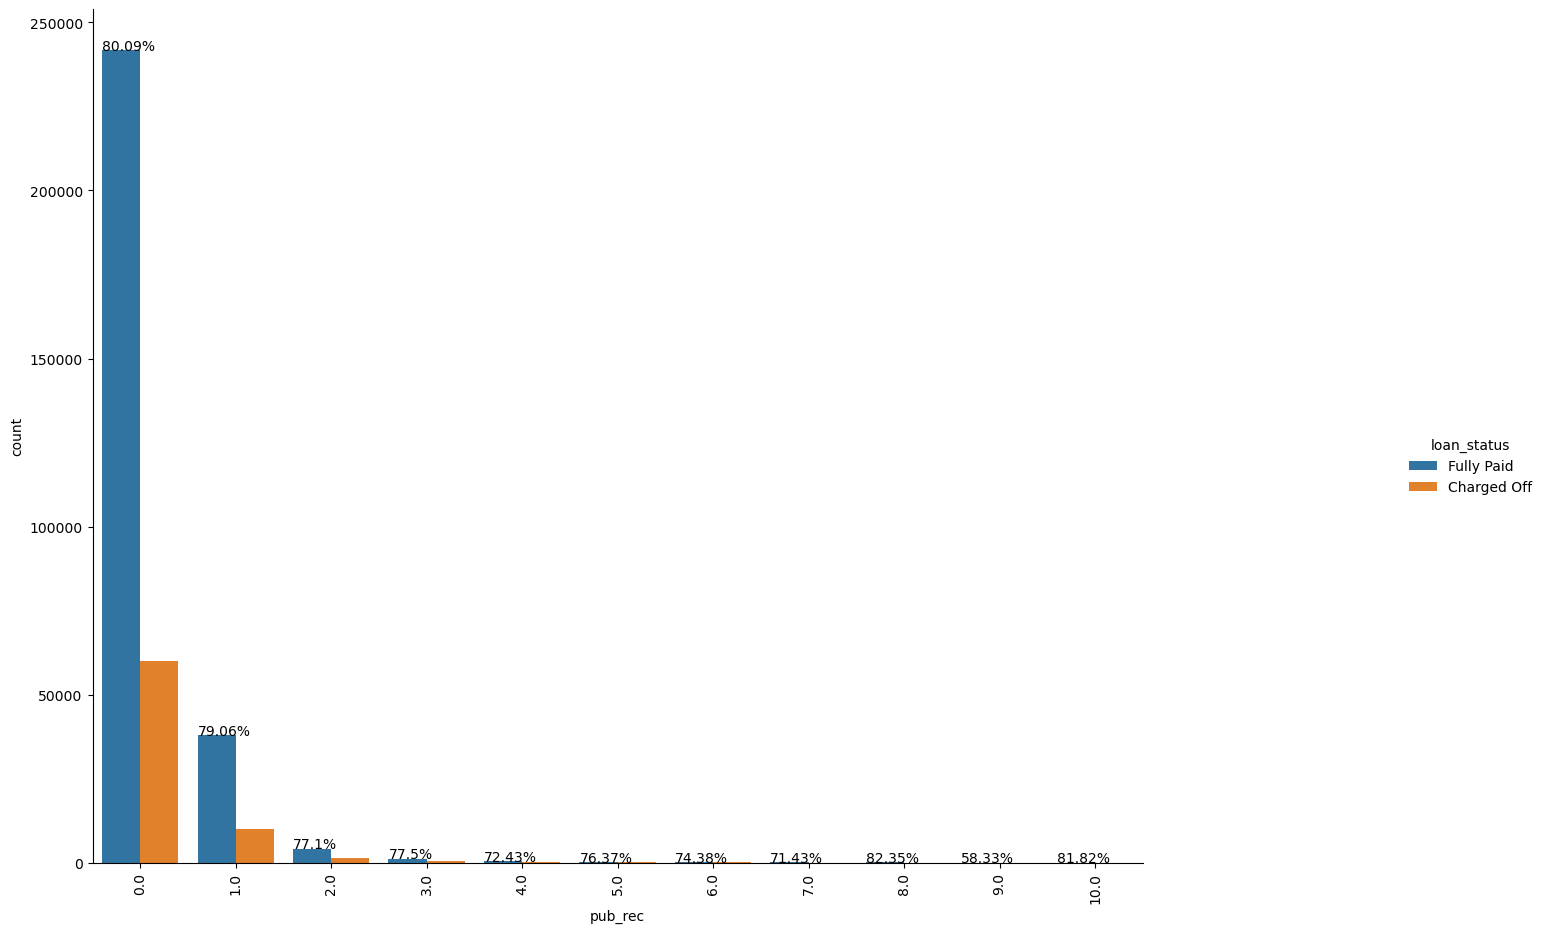

In [75]:
g = feature_countplot(df, x='pub_rec', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)
g.fig.set_size_inches(18, 10)

In [76]:
df['revol_bal'].value_counts()

0.0         1255
5655.0        39
7792.0        36
8708.0        34
6077.0        34
            ... 
43506.0        1
253458.0       1
51588.0        1
51139.0        1
31702.0        1
Name: revol_bal, Length: 54074, dtype: int64

In [77]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [78]:
df['revol_bal'].describe()

count    357680.000
mean      16074.831
std       21031.350
min           0.000
25%        6212.000
50%       11352.000
75%       19837.000
max     1743266.000
Name: revol_bal, dtype: float64

In [79]:
(df['revol_bal'] > 200000).sum()

691

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

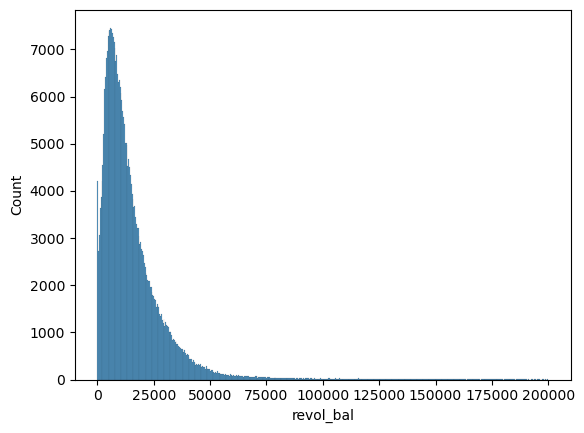

In [80]:
sns.histplot(data=df[df['revol_bal'] < 200000], x='revol_bal')

In [81]:
df =  df[df['revol_bal'] <= 200000]

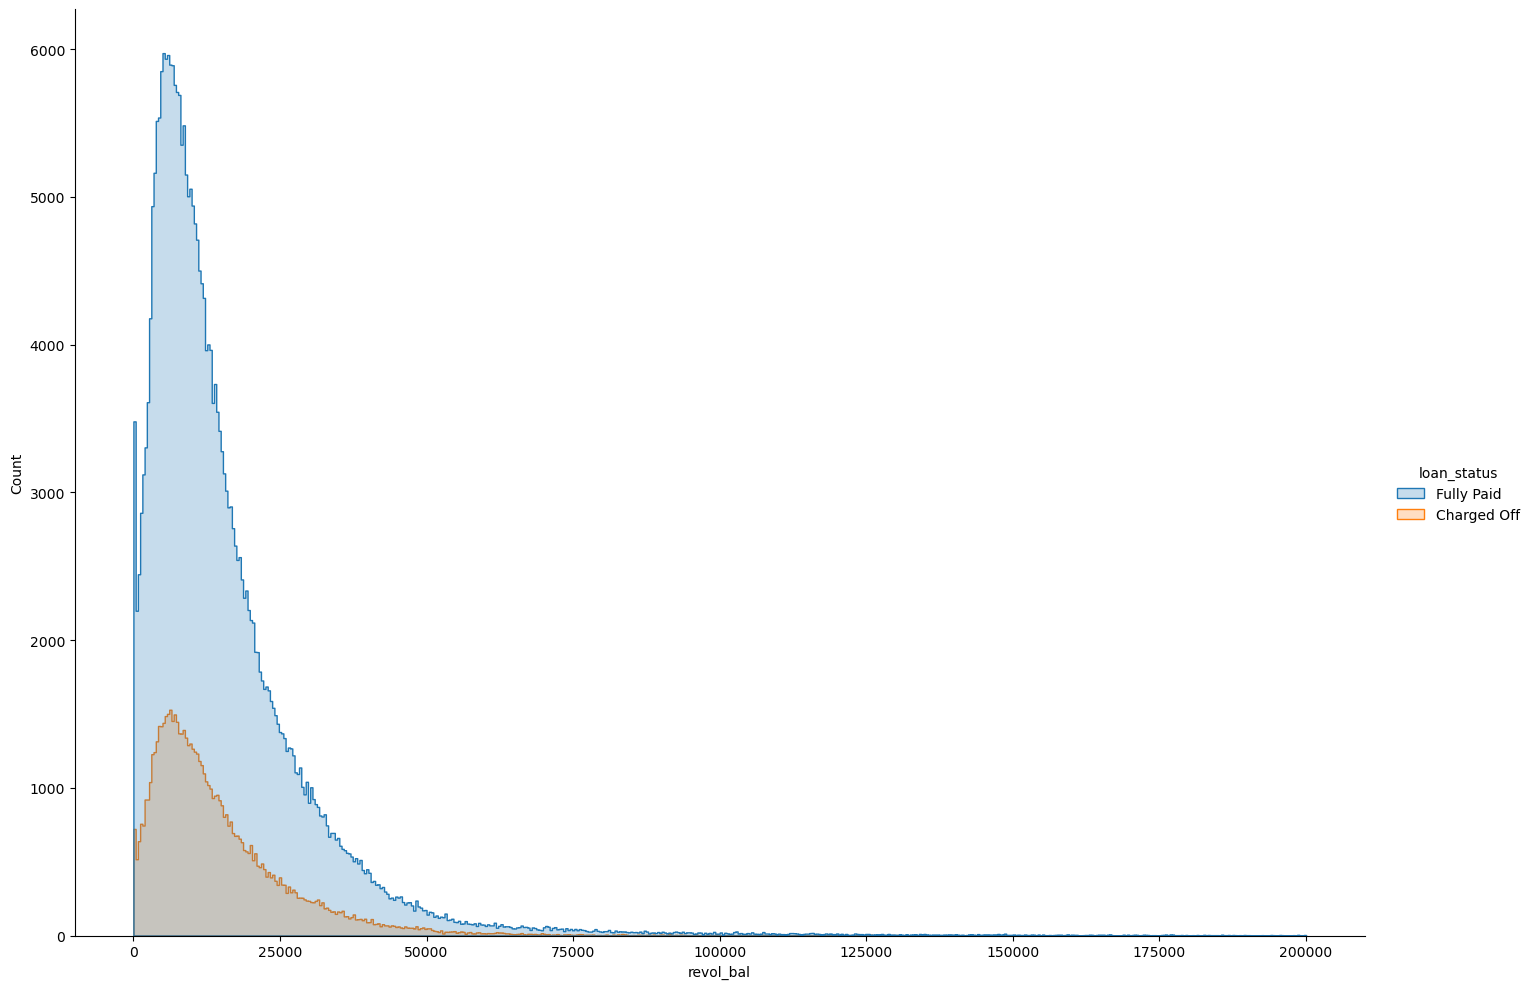

In [82]:
g = sns.displot(df, x="revol_bal", hue="loan_status", element="step", height=10, aspect=1.4)

## dti სა და revol_bal სთვის, Fully Paid და Charged off დისტრიბუციები საკმაოდ წააგავს ერთმანეთს, ამიტომ ამ ეტაპზე უბრალოდ დავტოვებ ამ ორ სვეტს. აუთლაიერები აქვე გავფილტრე, რადგან დისტრიბუციები ნორმალურად გამოჩენილიყო.

In [83]:
df['revol_util'].value_counts()

0.000      1336
53.000      704
60.000      692
57.000      687
61.000      683
           ... 
146.100       1
111.100       1
108.600       1
129.500       1
128.100       1
Name: revol_util, Length: 1159, dtype: int64

In [84]:
df['revol_util'].describe()

count   356775.000
mean        54.177
std         23.993
min          0.000
25%         36.600
50%         55.100
75%         72.800
max        892.300
Name: revol_util, dtype: float64

## 150 ზე მეტი მხოლოდ 4 მონაცემი ფიქსირდება, ამიტომ აუთლაიერებად გავფილტრავ.

In [85]:
(df['revol_util'] > 150).sum()

4

In [86]:
df = df[df['revol_util'] <= 150]

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

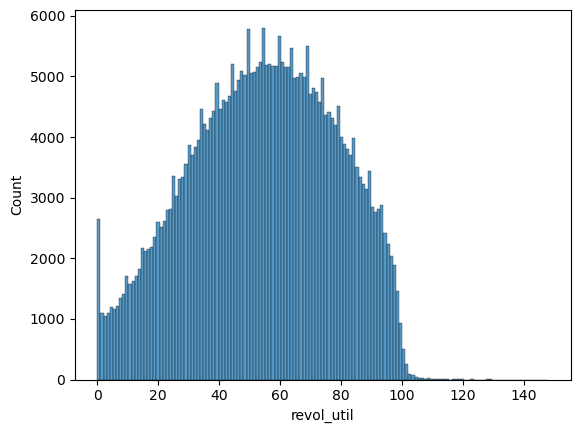

In [87]:
sns.histplot(data=df, x='revol_util')

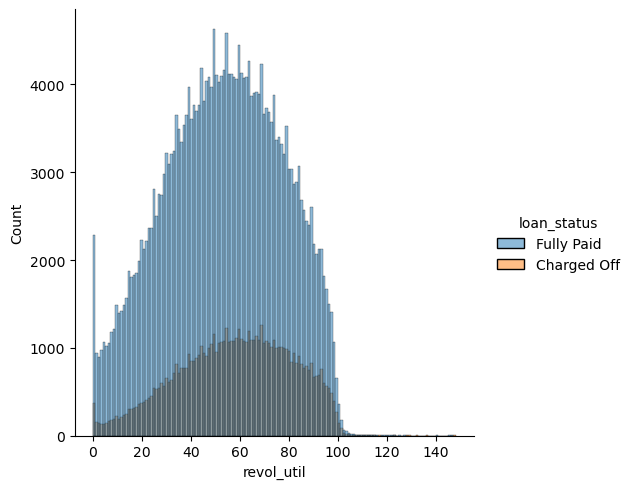

In [88]:
sns.displot(df, x='revol_util', hue='loan_status')

In [89]:
df['total_acc'].value_counts()

22.000     12961
21.000     12852
20.000     12834
23.000     12672
24.000     12560
           ...  
151.000        1
110.000        1
104.000        1
106.000        1
116.000        1
Name: total_acc, Length: 114, dtype: int64

In [90]:
df['total_acc'].describe()

count   356771.000
mean        25.734
std         11.855
min          2.000
25%         17.000
50%         24.000
75%         33.000
max        151.000
Name: total_acc, dtype: float64

## 100 ზე მეტი მხოლოდ 23 მონაცემია, ამათაც გავფილტრავ.

In [91]:
(df['total_acc'] > 100).sum()

23

In [92]:
df = df[df['total_acc'] <= 100]

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

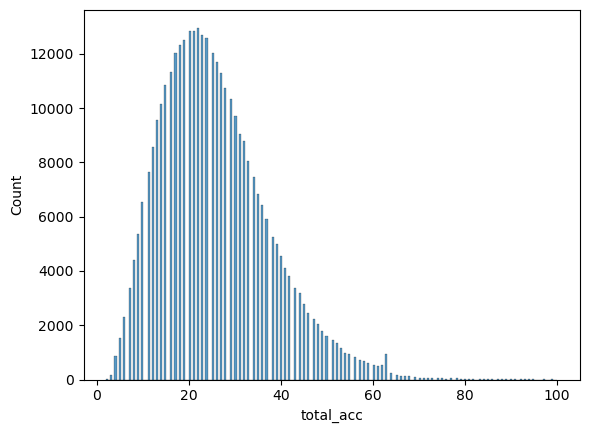

In [93]:
sns.histplot(df, x='total_acc')

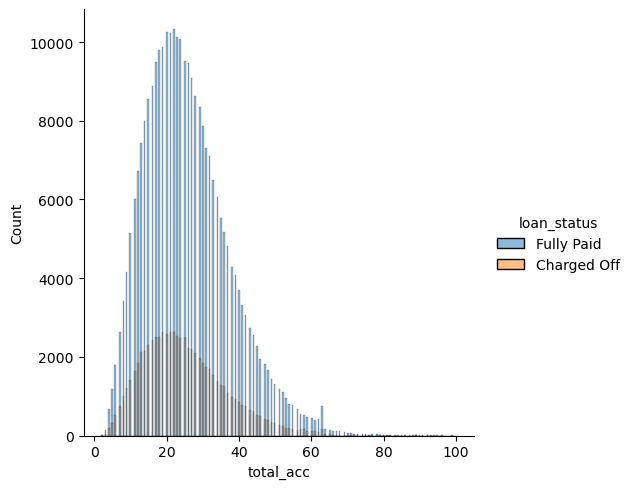

In [94]:
sns.displot(df, x='total_acc', hue='loan_status')

## ამ გრაფიდან ნათლად არ ჩანს დამოკიდებულება loan_status სა და total_acc -ს შორის, ამიტომ countplot ების და პროცენტების შედარებით უკეთ გამოვიკვლევ.

In [95]:
counts = df['total_acc'].value_counts()
counts

22.000     12961
21.000     12852
20.000     12834
23.000     12672
24.000     12560
           ...  
97.000         4
95.000         4
96.000         3
98.000         1
100.000        1
Name: total_acc, Length: 99, dtype: int64

In [96]:
df = df[df['total_acc'].isin(counts[counts >= 40].index)]

In [97]:
temp_df = df[df['total_acc'].isin(counts[counts >= 100].index)]

In [98]:
class_order = list(temp_df['total_acc'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

## როგორც ჩანს loan_status total_acc ზე დიდად დამოკიდებული არ არის, ამიტომ შეგვიძლია total_acc დავდროპოთ.

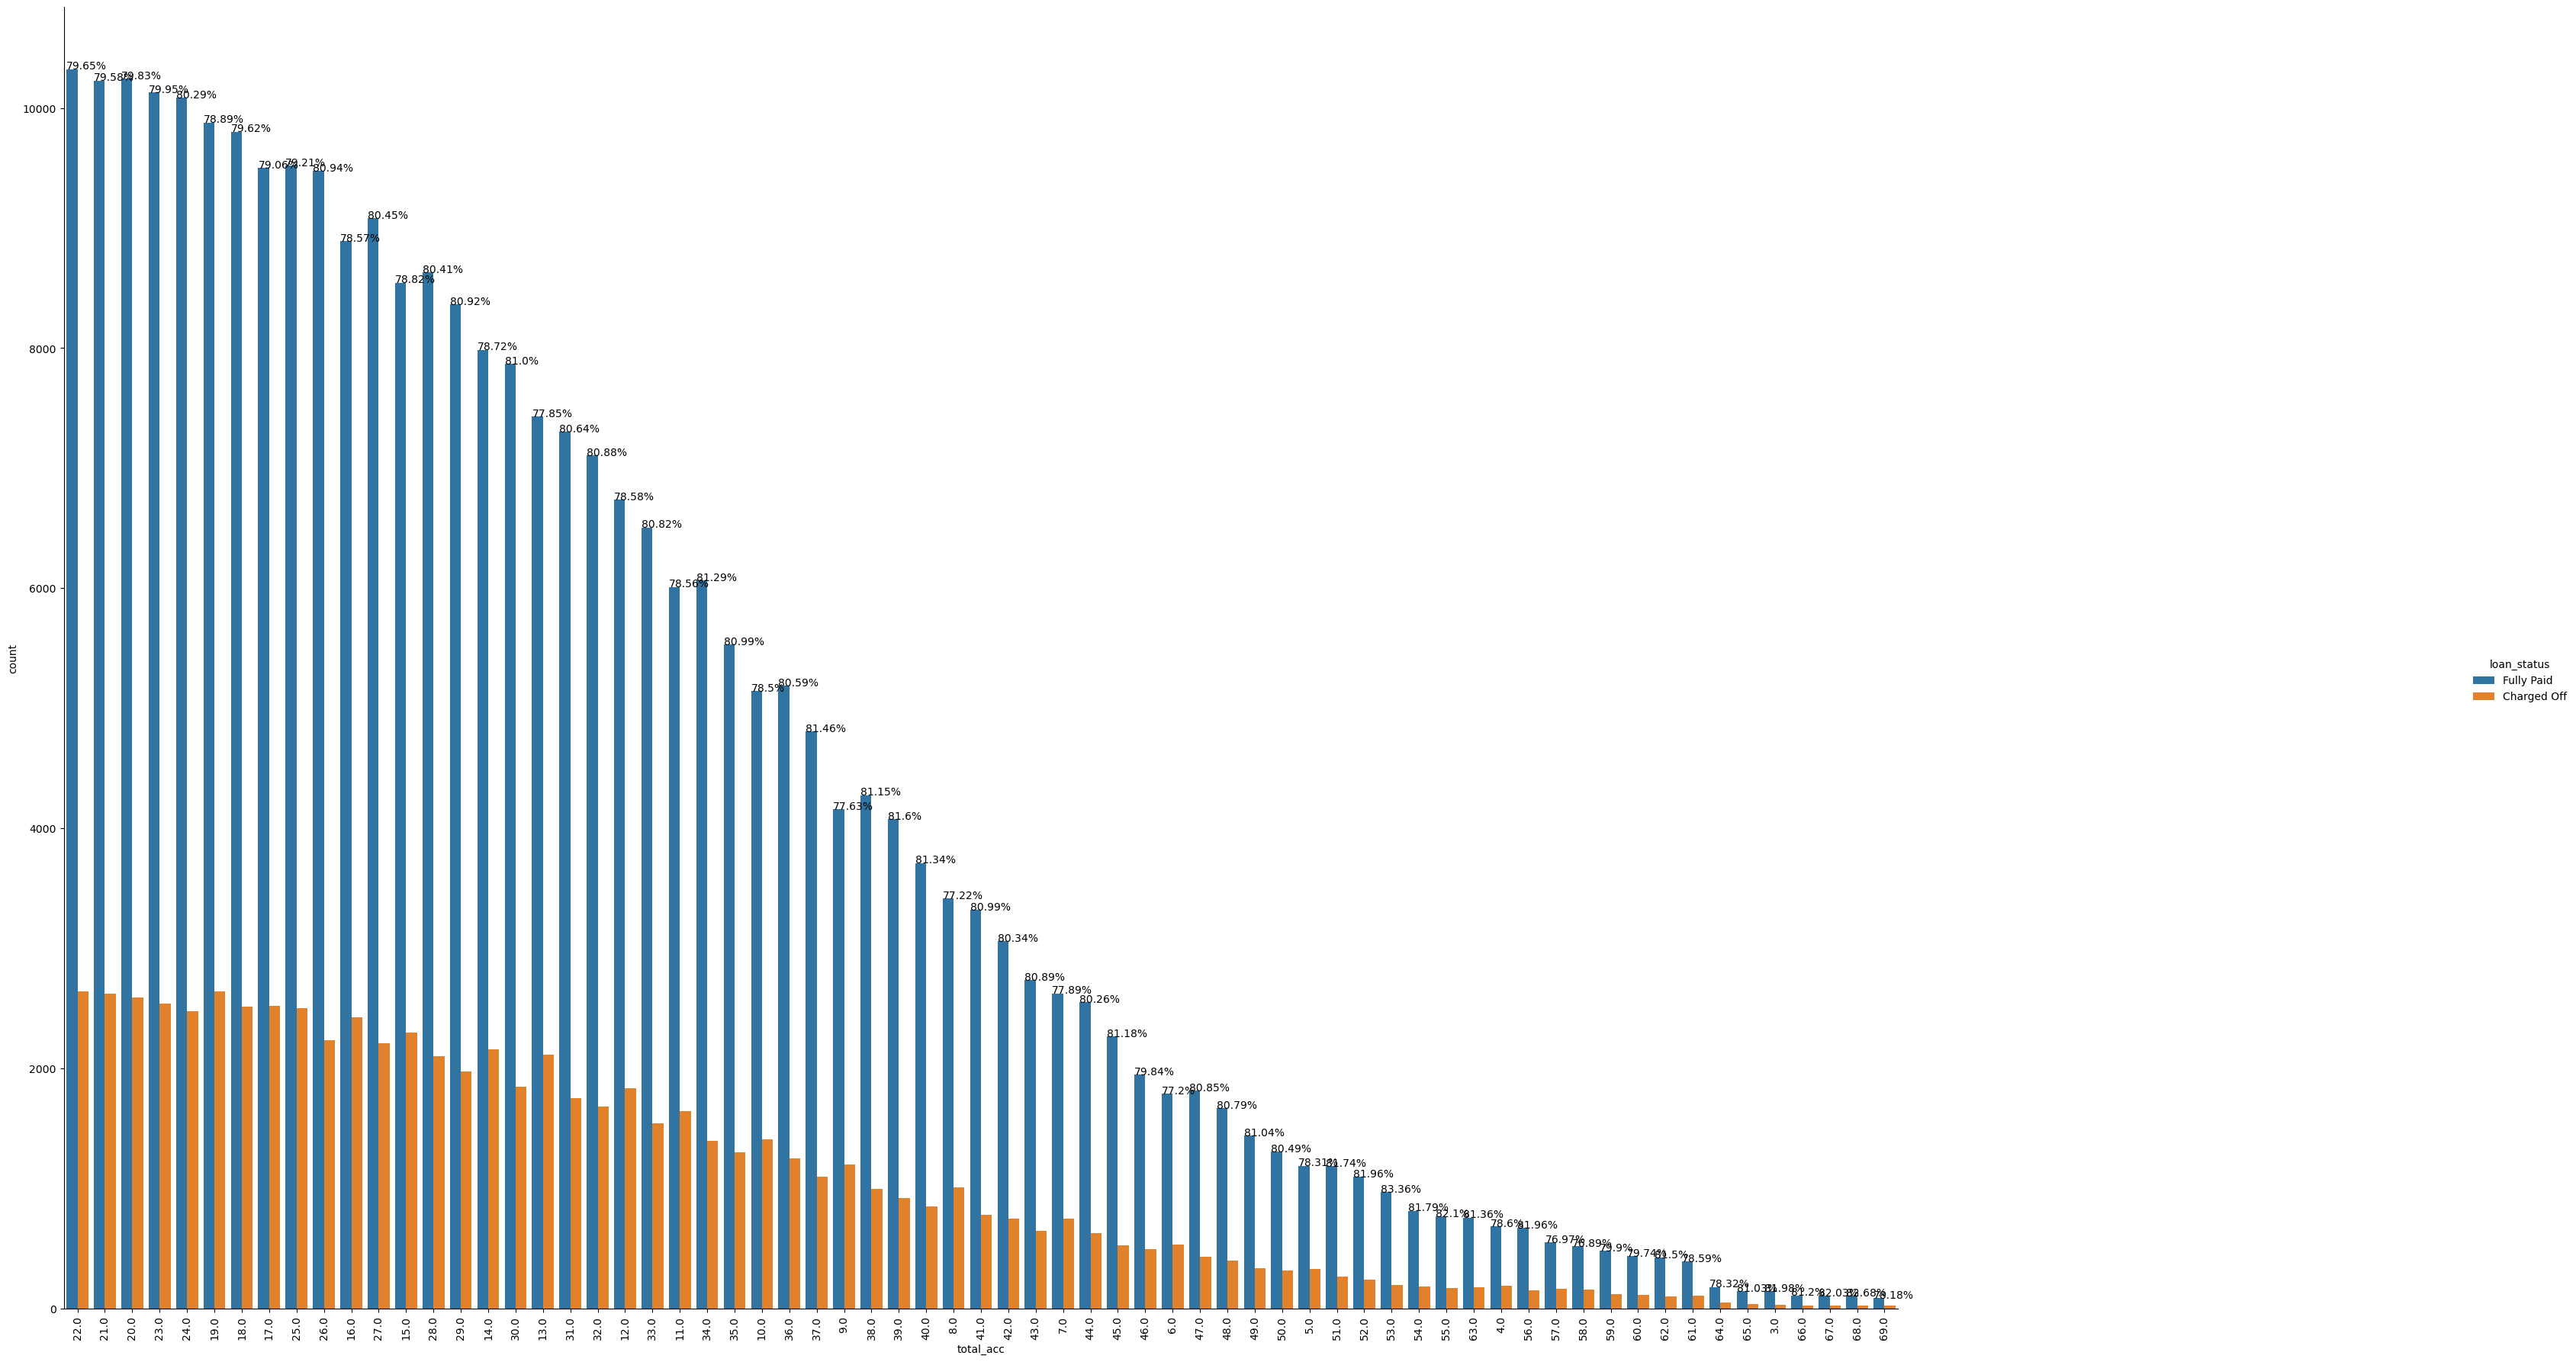

In [99]:
g = feature_countplot(temp_df, x='total_acc', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)
g.fig.set_size_inches(40, 20)

## address ის ველიდან ერთადერთი zip code ბის ამოღება შეგვიძლია, თუმცა რამდენადაც წავიკითხე, ამ ადრესებში ბევრი შეცდომებია, ამიტომ უბრალოდ დავდროპავ მთლიან სვეტს.

In [100]:
df['address'].value_counts()

USNS Johnson\nFPO AE 05113                                8
USS Johnson\nFPO AE 48052                                 7
USS Smith\nFPO AP 70466                                   7
USCGC Jones\nFPO AE 22690                                 6
USCGC Smith\nFPO AA 70466                                 6
                                                         ..
USCGC Acosta\nFPO AE 30723                                1
462 James Spurs\nWest Alexis, WY 30723                    1
521 James Walks\nSouth Nathan, DE 30723                   1
594 Cunningham Motorway Apt. 566\nJonesburgh, WA 29597    1
7843 Blake Freeway Apt. 229\nNew Michael, FL 29597        1
Name: address, Length: 354501, dtype: int64

## Application_type ში მონაცემების 99%+ ერთი და იგივე მნიშვნელობაა, თუმცა loan_status ზე საგრძნობლად განსხვავებული განაწილება აქვთ. შეგვიძლია ეს მონაცემები დავდროპოთ, ან დავა onehot-encode ოთ. წესით არსებითი მნიშვნელობა არ უნდა ჰქონდეს.

In [101]:
df['application_type'].value_counts()

INDIVIDUAL    356024
JOINT            370
DIRECT_PAY        44
Name: application_type, dtype: int64

In [102]:
class_order = list(temp_df['application_type'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

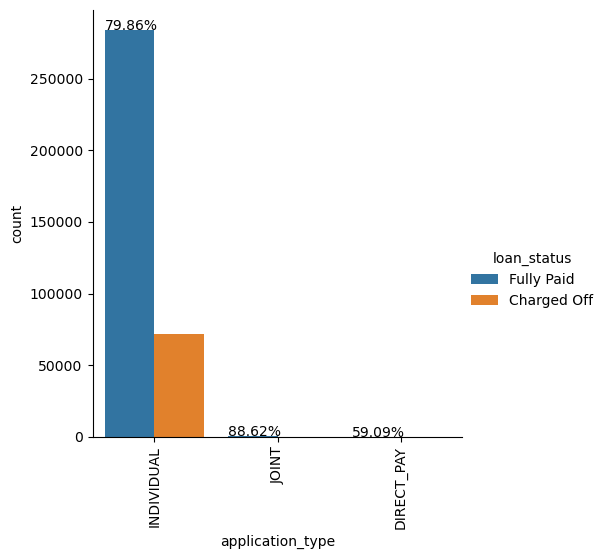

In [103]:
g = feature_countplot(temp_df, x='application_type', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)

In [104]:
counts = df['pub_rec_bankruptcies'].value_counts()
counts

0.000    312949
1.000     41181
2.000      1834
3.000       348
4.000        81
5.000        32
6.000         7
7.000         4
8.000         2
Name: pub_rec_bankruptcies, dtype: int64

In [105]:
df = df[df['pub_rec_bankruptcies'].isin(counts[counts >= 30].index)]

In [106]:
class_order = list(df['pub_rec_bankruptcies'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

## ჩემი ინტუიცია არის, რომ bankruptcies ზრდასთან ერთად, fully paid ის პროცენტულობა იკლებდეს, თუმცა 2 ზე მეტი მნიშვნელობები საკმაოდ ცოტაა და შესაბამისად ვარიაციული. შეგვიძლია, უბრალოდ 2 ზე მეტი მნიშვნელობები დავდროპოთ, ან მთლიანად გადავაგდოთ ეს სვეტი, რადგან 0 სა და 1 ს შორის სხვაობა მინიმალურია და მონაცემების უდიდესი ნაწილი სწორედ ამ მნიშვნელობებს იღებს.

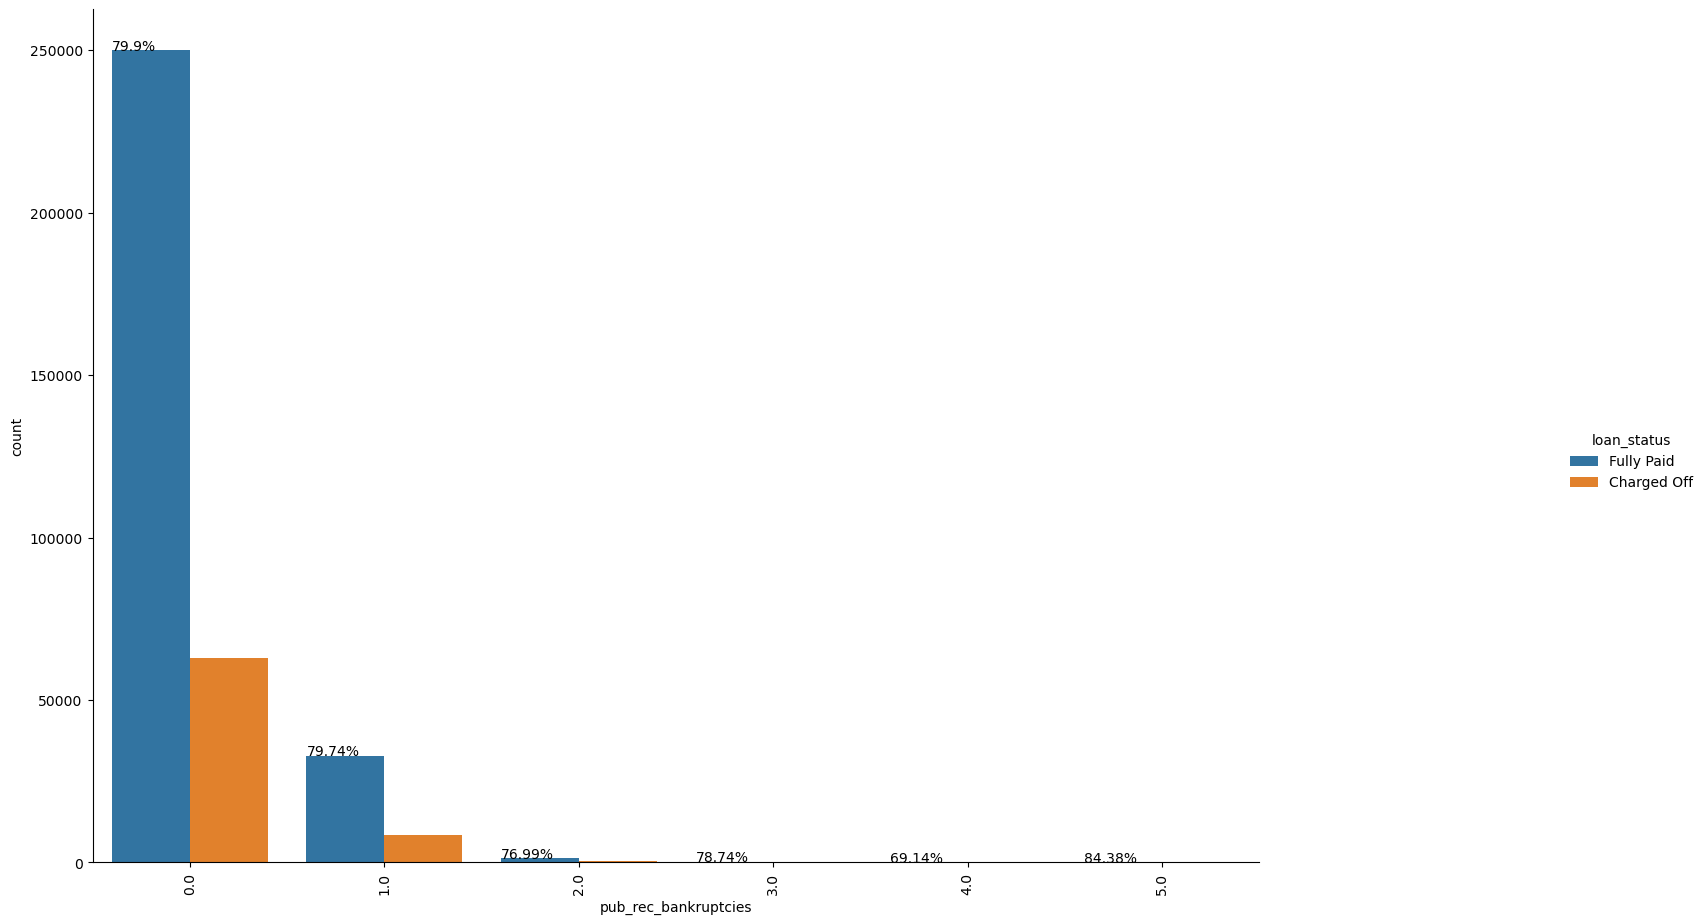

In [107]:
g = feature_countplot(df, x='pub_rec_bankruptcies', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)
g.fig.set_size_inches(20, 10)

In [108]:
df['initial_list_status'].value_counts()

f    199394
w    157031
Name: initial_list_status, dtype: int64

In [109]:
class_order = list(df['initial_list_status'].value_counts().index)
hue_order = ['Fully Paid', 'Charged Off']

## Initial list status არანაირ სხვაობას არ იძლევა loan_status ზე, შეგვიძლია გადავაგდოთ.

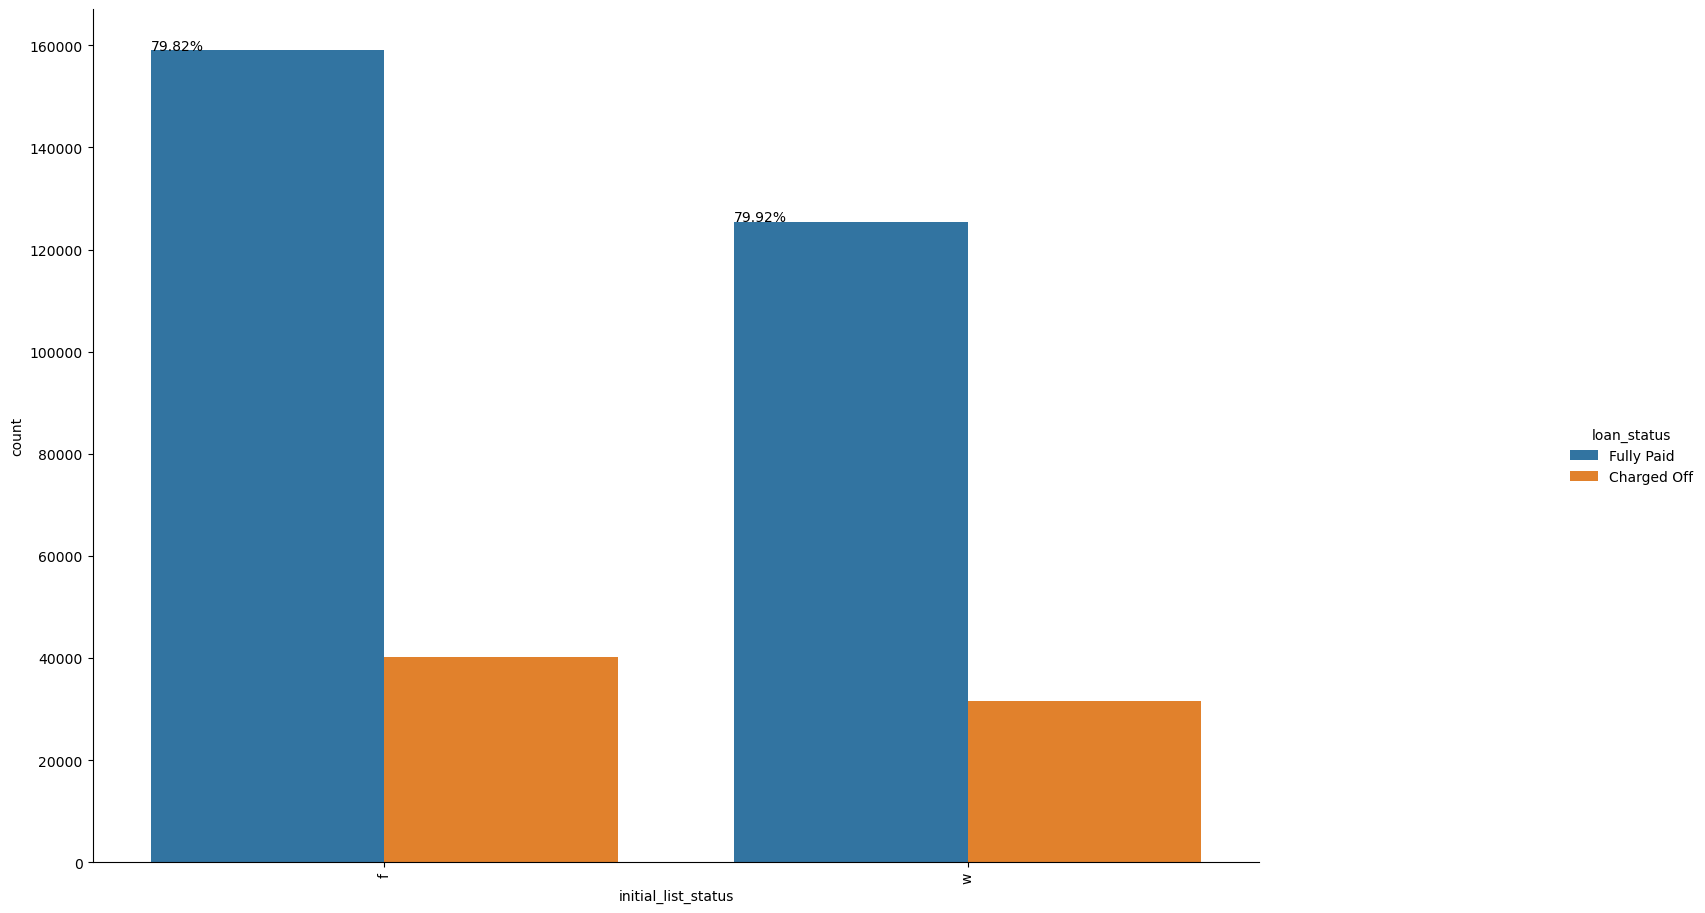

In [110]:
g = feature_countplot(df, x='initial_list_status', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)
g.fig.set_size_inches(20, 10)

In [111]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356425 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             356425 non-null  float64
 1   term                  356425 non-null  object 
 2   int_rate              356425 non-null  float64
 3   installment           356425 non-null  float64
 4   grade                 356425 non-null  object 
 5   sub_grade             356425 non-null  object 
 6   emp_title             336053 non-null  object 
 7   emp_length            339279 non-null  object 
 8   home_ownership        356425 non-null  object 
 9   annual_inc            356425 non-null  float64
 10  verification_status   356425 non-null  object 
 11  issue_d               356425 non-null  object 
 12  loan_status           356425 non-null  object 
 13  purpose               356425 non-null  object 
 14  title                 354720 non-null  object 
 15  

# Data Cleaning / Filling Missing Values

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356425 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             356425 non-null  float64
 1   term                  356425 non-null  object 
 2   int_rate              356425 non-null  float64
 3   installment           356425 non-null  float64
 4   grade                 356425 non-null  object 
 5   sub_grade             356425 non-null  object 
 6   emp_title             336053 non-null  object 
 7   emp_length            339279 non-null  object 
 8   home_ownership        356425 non-null  object 
 9   annual_inc            356425 non-null  float64
 10  verification_status   356425 non-null  object 
 11  issue_d               356425 non-null  object 
 12  loan_status           356425 non-null  object 
 13  purpose               356425 non-null  object 
 14  title                 354720 non-null  object 
 15  

In [113]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

emp_title              5.716
emp_length             4.811
title                  0.478
loan_amnt              0.000
dti                    0.000
pub_rec_bankruptcies   0.000
mort_acc               0.000
application_type       0.000
initial_list_status    0.000
total_acc              0.000
revol_util             0.000
revol_bal              0.000
pub_rec                0.000
open_acc               0.000
earliest_cr_line       0.000
purpose                0.000
term                   0.000
loan_status            0.000
issue_d                0.000
verification_status    0.000
annual_inc             0.000
home_ownership         0.000
sub_grade              0.000
grade                  0.000
installment            0.000
int_rate               0.000
address                0.000
dtype: float64

In [114]:
df['title'].value_counts()

Debt consolidation            151272
Credit card refinancing        51174
Home improvement               15057
Other                          12773
Debt Consolidation              9275
                               ...  
wedding consolidation loan         1
1 payment loan plan                1
Peace Of Mind Loan                 1
Debt/Home                          1
Loanforpayoff                      1
Name: title, Length: 34200, dtype: int64

* ## როგორც მაღლა აღვნიშნე, emp_title დავდროპოთ.
* ## emp_length ს დიდი ეფექტი არ ჰქონია loan_status ზე, ამიტომ შეგვიძლია ეს სვეტიც დავდროპოთ.
* ## mort_acc მნიშვნელოვანი ინფორმაციაა, დავდროპოთ ნულოვანი სტრიქონები (ეს ავტომატურად მოხდა 10 ზე მეტების გაფილტვრისას).
* ## title - ს ასევე ვერ გამოვიყენებთ, ამიტომ დავდროპავ სვეტს.
* ## დავდროპოთ total_acc სვეტი.
* ## დავდროპოთ address სვეტი.
* ## დავდროპოთ issue_d სვეტი.
* ## დავდროპოთ initial_list_status სვეტი.
* ## რადგან sub_grade მოიცავს grade ის ინფორმაციას, შეგვიძლია grade დავდროპოთ.
* ## დავდროპოთ initial_list_status, რადგან როგორც ვნახეთ არანაირი გავლენა არ ჰქონდა loan_status ზე.
* ## დავდროპოთ application_type, რადგან თითქმის ყველა მონაცემი იგივე მნიშვნელობას იღებს.

In [115]:
df = df.drop('emp_title', axis=1)
df = df.drop('emp_length', axis=1)
df = df.drop('title', axis=1)
# df = df.dropna(subset=['mort_acc'])
df = df.drop('total_acc', axis=1)
df = df.drop('address', axis=1)
df = df.drop('issue_d', axis=1)
df = df.drop('grade', axis=1)
df = df.drop('initial_list_status', axis=1)
df = df.drop('application_type', axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356425 entries, 0 to 396028
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             356425 non-null  float64
 1   term                  356425 non-null  object 
 2   int_rate              356425 non-null  float64
 3   installment           356425 non-null  float64
 4   sub_grade             356425 non-null  object 
 5   home_ownership        356425 non-null  object 
 6   annual_inc            356425 non-null  float64
 7   verification_status   356425 non-null  object 
 8   loan_status           356425 non-null  object 
 9   purpose               356425 non-null  object 
 10  dti                   356425 non-null  float64
 11  earliest_cr_line      356425 non-null  object 
 12  open_acc              356425 non-null  float64
 13  pub_rec               356425 non-null  float64
 14  revol_bal             356425 non-null  float64
 15  

In [117]:
df = df.dropna()

## 14 ზე მეტი mort_acc ები გადავაგდოთ, რადგან ცოტა და ვარიაციული მონაცემებია.

In [118]:
df = df[df['mort_acc'] <= 14]

In [119]:
df['mort_acc'].value_counts()

0.000     139361
1.000      60155
2.000      49646
3.000      37793
4.000      27709
5.000      18056
6.000      10977
7.000       6000
8.000       3092
9.000       1635
10.000       855
11.000       474
12.000       263
13.000       145
14.000       104
Name: mort_acc, dtype: int64

## როგორც ზემოთ აღვნიშნე, pub_rec ში 4 ზე მეტი მნიშვნელობის მქონე მონაცემები გადავაგდოთ

In [120]:
df['pub_rec'].value_counts()

0.000     300652
1.000      47723
2.000       5400
3.000       1511
4.000        525
5.000        236
6.000        114
7.000         51
8.000         31
9.000         11
10.000        11
Name: pub_rec, dtype: int64

In [121]:
df = df[df['pub_rec'] <= 4]

# Data Preprocessing

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355811 entries, 0 to 396028
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             355811 non-null  float64
 1   term                  355811 non-null  object 
 2   int_rate              355811 non-null  float64
 3   installment           355811 non-null  float64
 4   sub_grade             355811 non-null  object 
 5   home_ownership        355811 non-null  object 
 6   annual_inc            355811 non-null  float64
 7   verification_status   355811 non-null  object 
 8   loan_status           355811 non-null  object 
 9   purpose               355811 non-null  object 
 10  dti                   355811 non-null  float64
 11  earliest_cr_line      355811 non-null  object 
 12  open_acc              355811 non-null  float64
 13  pub_rec               355811 non-null  float64
 14  revol_bal             355811 non-null  float64
 15  

### one-hot encode term

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355811 entries, 0 to 396028
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             355811 non-null  float64
 1   term                  355811 non-null  object 
 2   int_rate              355811 non-null  float64
 3   installment           355811 non-null  float64
 4   sub_grade             355811 non-null  object 
 5   home_ownership        355811 non-null  object 
 6   annual_inc            355811 non-null  float64
 7   verification_status   355811 non-null  object 
 8   loan_status           355811 non-null  object 
 9   purpose               355811 non-null  object 
 10  dti                   355811 non-null  float64
 11  earliest_cr_line      355811 non-null  object 
 12  open_acc              355811 non-null  float64
 13  pub_rec               355811 non-null  float64
 14  revol_bal             355811 non-null  float64
 15  

In [124]:
df['term'].value_counts()

 36 months    272006
 60 months     83805
Name: term, dtype: int64

In [125]:
# def transform_data(data):
#     data =data.reset_index(inplace=True, drop=True)

# #     grade_dict = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}    
# #     df['grade'].replace(grade_dict, inplace=True)

#     data = data.join(pd.get_dummies(data['term']))
#     data = data.drop('term', axis=1)
    
#     data = data['loan_status'].replace({"Fully Paid": 0, "Charged Off": 1}, inplace=True)
    
#     sub_grade_list = np.sort(data['sub_grade'].unique())
#     sub_grade_dict = {}
    
#     for idx, grade in enumerate(sub_grade_list):
#         sub_grade_dict[grade] = idx + 1
    
#     data = data['sub_grade'].replace(sub_grade_dict)
    
#     data = data.join(pd.get_dummies(data['home_ownership']))
#     data = data.drop('home_ownership', axis=1)
    
#     data = data.join(pd.get_dummies(data['verification_status']))
#     data = data.drop('verification_status', axis=1)
    
#     data = data.join(pd.get_dummies(data['purpose']))
#     data = data.drop('purpose', axis=1)
    
#     # transform to datetime
#     data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#     data['year'] = data['earliest_cr_line'].dt.year
#     counts = data['year'].value_counts()
#     data = data[data['year'].isin(counts[counts >= 20].index)]
#     data = data.drop('earliest_cr_line', axis=1)
    
#     return data
    

* ## one-hot encode term
* ## შევცვალოთ grade ordinal encoding ით, რადგან იერარქიული მონაცემებია. (1 დან n მდე).
* ## შევცვალოთ loan_status 1 და 0 ით.
* ## შევცვალოთ sub_grade ordinal encoding ით.
* ## one-hot encode home_ownership
* ## one-hot encode verification_status
* ## one-hot encode purpose
* ## გადავაქციოთ earliest_cr_line datetime ობიექტში და ამოვიღოთ წლის მონაცემი. გავფილტროთ ისეთი წლები, რომლებიც 20 ჯერ მაინც დაფიქსირდა, რათა ვარიაციული მონაცემები თავიდან ავირიდოთ.

In [126]:
def transform_data(df):
    df.reset_index(inplace=True, drop=True)

#     grade_dict = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}    
#     df['grade'].replace(grade_dict, inplace=True)

    df = df.join(pd.get_dummies(df['term']))
    df = df.drop('term', axis=1)
    
    df['loan_status'].replace({"Fully Paid": 0, "Charged Off": 1}, inplace=True)
    
    sub_grade_list = np.sort(df['sub_grade'].unique())
    sub_grade_dict = {}
    
    for idx, grade in enumerate(sub_grade_list):
        sub_grade_dict[grade] = idx + 1
    
    df['sub_grade'].replace(sub_grade_dict, inplace=True)
    
    df = df.join(pd.get_dummies(df['home_ownership']))
    df = df.drop('home_ownership', axis=1)
    
    df = df.join(pd.get_dummies(df['verification_status']))
    df.drop('verification_status', axis=1, inplace=True)
    
    df = df.join(pd.get_dummies(df['purpose']))
    df.drop('purpose', axis=1, inplace=True)
    
    # transform to datetime
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
    df['year'] = df['earliest_cr_line'].dt.year
    counts = df['year'].value_counts()
    df = df[df['year'].isin(counts[counts >= 20].index)]
    df.drop('earliest_cr_line', axis=1, inplace=True)
    
    return df
    

In [127]:
df = transform_data(df)

In [128]:
df.head()

,loan_amnt,int_rate,installment,sub_grade,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,year
0,10000.000,11.440,329.480,9,117000.000,0,26.240,16.000,0.000,36369.000,...,0,0,0,0,0,0,0,1,0,1990
1,8000.000,11.990,265.680,10,65000.000,0,22.050,17.000,0.000,20131.000,...,0,0,0,0,0,0,0,0,0,2004
2,15600.000,10.490,506.970,8,43057.000,0,12.790,13.000,0.000,11987.000,...,0,0,0,0,0,0,0,0,0,2007
3,7200.000,6.490,220.650,2,54000.000,0,2.600,6.000,0.000,5472.000,...,0,0,0,0,0,0,0,0,0,2006
4,24375.000,17.270,609.330,15,55000.000,1,33.950,13.000,0.000,24584.000,...,0,0,0,0,0,0,0,0,0,1999


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355730 entries, 0 to 355810
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             355730 non-null  float64
 1   int_rate              355730 non-null  float64
 2   installment           355730 non-null  float64
 3   sub_grade             355730 non-null  int64  
 4   annual_inc            355730 non-null  float64
 5   loan_status           355730 non-null  int64  
 6   dti                   355730 non-null  float64
 7   open_acc              355730 non-null  float64
 8   pub_rec               355730 non-null  float64
 9   revol_bal             355730 non-null  float64
 10  revol_util            355730 non-null  float64
 11  mort_acc              355730 non-null  float64
 12  pub_rec_bankruptcies  355730 non-null  float64
 13   36 months            355730 non-null  uint8  
 14   60 months            355730 non-null  uint8  
 15  

In [130]:
# class_order = list(df['year'].value_counts().index)
# hue_order = ['Fully Paid', 'Charged Off']

In [131]:
# g = feature_countplot(df, x='year', hue='loan_status', hue_order=hue_order, class_order=class_order, rotate=True, display_odds=True)


# Building Models

## Train-Test Split

In [132]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGB Classifier

In [134]:
xgb_model = XGBClassifier(use_label_encoder=False)

In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284584 entries, 165760 to 121988
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             284584 non-null  float64
 1   int_rate              284584 non-null  float64
 2   installment           284584 non-null  float64
 3   sub_grade             284584 non-null  int64  
 4   annual_inc            284584 non-null  float64
 5   dti                   284584 non-null  float64
 6   open_acc              284584 non-null  float64
 7   pub_rec               284584 non-null  float64
 8   revol_bal             284584 non-null  float64
 9   revol_util            284584 non-null  float64
 10  mort_acc              284584 non-null  float64
 11  pub_rec_bankruptcies  284584 non-null  float64
 12   36 months            284584 non-null  uint8  
 13   60 months            284584 non-null  uint8  
 14  MORTGAGE              284584 non-null  uint8  


In [136]:
xgb_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:46:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [137]:
xgb_y_train = xgb_model.predict(X_train)
xgb_y_test = xgb_model.predict(X_test)

In [138]:
df['loan_status'].value_counts()

0    284140
1     71590
Name: loan_status, dtype: int64

In [139]:
y_test.value_counts()

0    56847
1    14299
Name: loan_status, dtype: int64

In [140]:
print("Train Set Error:", (xgb_y_train == y_train).sum() / len(y_train))
print("Validation Set Error:", (xgb_y_test == y_test).sum() / len(y_test))
print("Train Set ROC score:", roc_auc_score(xgb_y_train, y_train))
print("Test Set ROC SCORE:", roc_auc_score(xgb_y_test, y_test))

Train Set Error: 0.8125474376633964
Validation Set Error: 0.8016473167852023
Train Set ROC score: 0.7456349915309404
Test Set ROC SCORE: 0.6731310662652784


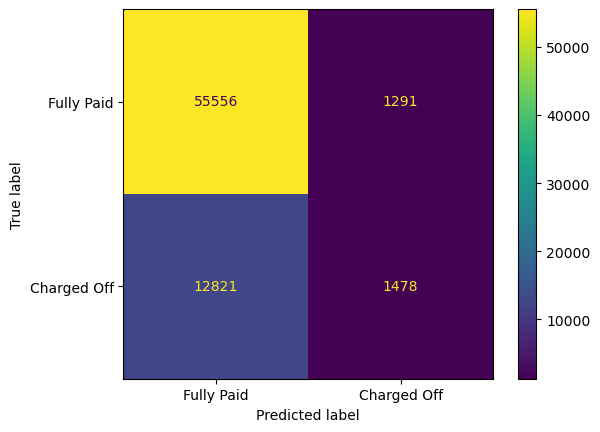

In [141]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X=X_test, y=y_test, display_labels=["Fully Paid", "Charged Off"])

In [151]:
(55556 + 12821) / (55556 + 12821 + 1291 + 1478) * 100

96.10800326090012

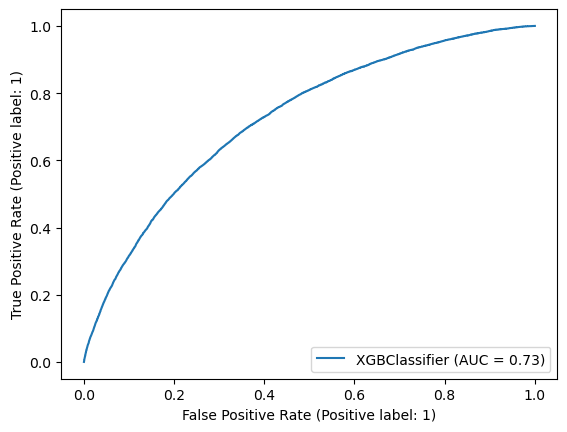

In [142]:
RocCurveDisplay.from_estimator(xgb_model, X=X_test, y=y_test)

Plotting Feature Importance


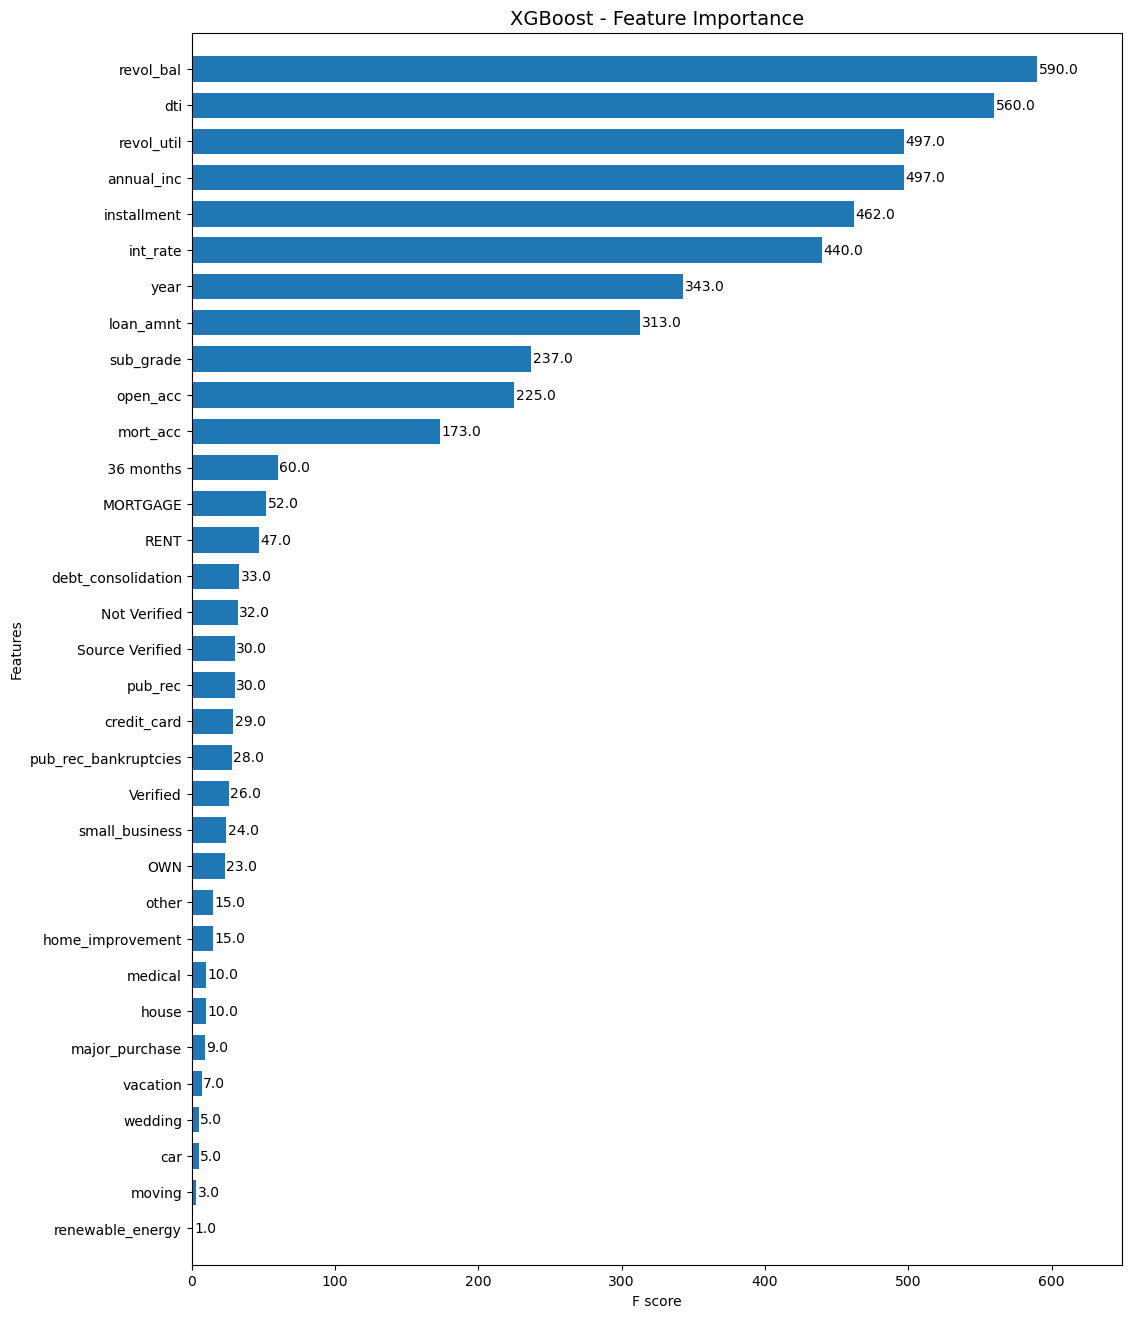

In [143]:
print('Plotting Feature Importance')
fig, ax = plt.subplots(figsize=(12,16))
xgb.plot_importance(xgb_model, height=0.7, ax=ax)
ax.grid(False)
plt.title("XGBoost - Feature Importance", fontsize=14)
plt.show()

## XGBoost მოდელისთვის ყველაზე მნიშვნელოვანი პარამეტრები გარკვეულწილად შეესაბამება მოლოდინებს. int_rate როგორც ვახსენე საკმაოდ მნიშვნელოვანი იყ მოდელისთვის, ასევე მნიშვნელობა ჰქონდა loan_amnt სა და sub_grades. თუმცა, როგორც მოდელი 96% შემთხვევაში აბრუნებს Fully Paid - ს, როცა რეალურად უნდა აბრუნებდეს 80% შემთხვევააში.

## Random Forest Model

In [144]:
forest_model = RandomForestClassifier()

In [145]:
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [146]:
forest_y_train = forest_model.predict(X_train)
forest_y_test = forest_model.predict(X_test)

In [147]:
print("Train Set Error:", (forest_y_train == y_train).sum() / len(y_train))
print("Validation Set Error:", (forest_y_test == y_test).sum() / len(y_test))
print("Train Set ROC score:", roc_auc_score(forest_y_train, y_train))
print("Test Set ROC SCORE:", roc_auc_score(forest_y_test, y_test))

Train Set Error: 0.999968374891069
Validation Set Error: 0.8004666460517809
Train Set ROC score: 0.9999802025499115
Test Set ROC SCORE: 0.6657575249631249


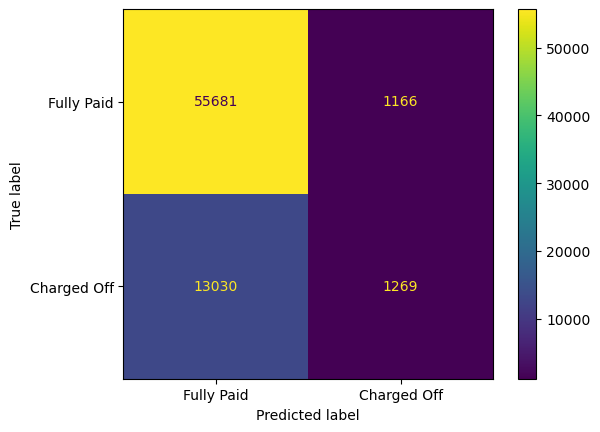

In [148]:
ConfusionMatrixDisplay.from_estimator(forest_model, X=X_test, y=y_test, display_labels=["Fully Paid", "Charged Off"])

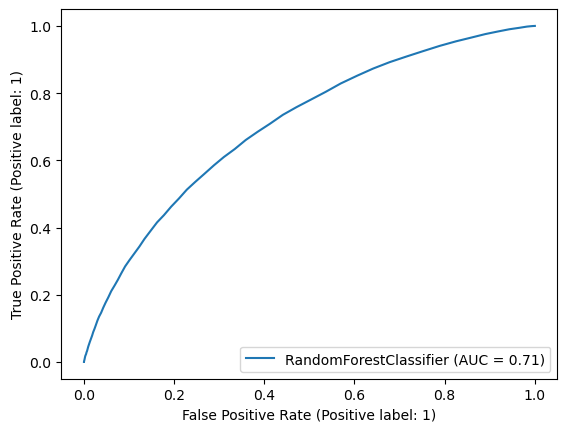

In [149]:
RocCurveDisplay.from_estimator(forest_model, X=X_test, y=y_test)

# Random Forest მოდელმაც xgboost ისნაირი შედეგი დადო, თითქმის მთლიანად Fully Paid ს აბრუნებს და train set ზე overfit მოახდინა.

# შეჯამება:
* ### მოდელის ჰიპერპარამეტრები უკეთაა შესარჩევი.
* ### შესაძლოა გამოსადეგი იყოს მეტი preprocessing ის განხორციელება და ახალი feature ბის შექმნა.
* ### უკეთაა გამოსაკვლევი, თუ რატომ ანიჭებს მოდელი გარკვეულ ცვლადებს დიდ მნიშვნელობას და რატომ უგულებელყოფს სხვებს, მაგალითად verification_status - ს.
* ### უფრო მეტი მონაცემის დამატებამ შესაძლოა გააუმჯობესოს მოდელის სიზუსტე.